In [1]:
import copy    
import numpy as np
import matplotlib.pyplot as plt
from PID import PID
import Medidas
import PSO
import pandas as pd
import warnings
from time import time

warnings.filterwarnings('ignore')

In [2]:
def sistema2df(sistema,path):
    iteracao = list()
    feature = list()
    passarinho = 0

    columns = ["P","I","D","P_pbest","I_pbest","D_pbest","P_gbest","I_gbest","D_gbest","V_p","V_i","V_d","erro","erro_gbest","I"]

    for passarinho in range(10):
        iteracao = list()
        for iter in range(len(sistema)):
            feature = list()

            feature.append(copy.deepcopy(sistema[iter][passarinho].X[0]))
            feature.append(sistema[iter][passarinho].X[1])
            feature.append(sistema[iter][passarinho].X[2])
            feature.append(sistema[iter][passarinho].pbest[0])
            feature.append(sistema[iter][passarinho].pbest[1])
            feature.append(sistema[iter][passarinho].pbest[2])
            feature.append(sistema[iter][passarinho].gbest[0])
            feature.append(sistema[iter][passarinho].gbest[1])
            feature.append(sistema[iter][passarinho].gbest[2])
            feature.append(sistema[iter][passarinho].V[0])
            feature.append(sistema[iter][passarinho].V[1])
            feature.append(sistema[iter][passarinho].V[2])
            feature.append(sistema[iter][passarinho].erro)
            feature.append(sistema[iter][passarinho].erro_gbest)
            feature.append(sistema[iter][passarinho].I)
            
            iteracao.append(feature)
        
        df = pd.DataFrame(iteracao, columns=columns)
        new_path = path + "/passarinho" + str(passarinho) + ".csv"
        df.to_csv(new_path)

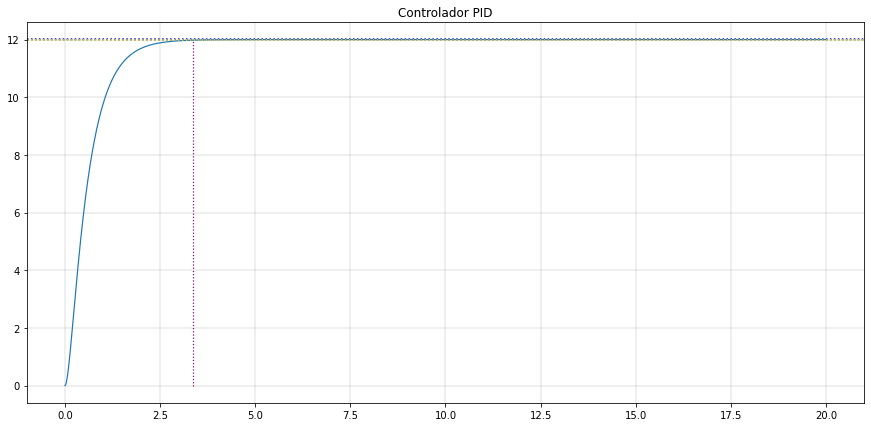

In [3]:
num = [200, 1200]
den = [1, 17, 80, 100]
set_point = 1.0

erro = list()
pid_param = list()

pid_param.append(num)
pid_param.append(den)
pid_param.append(set_point)

pid = PID(pid_param[0],pid_param[1])

erro.append(Medidas.Tempo_Acomodacao(pid, ma= True))
erro.append(Medidas.Overshoot(pid, ma = True))

Y,_ ,T = pid.resposta_MA()

pid.plot_MA(Y, T, erro)

<- particulas geradas aleatóriamente ->
particula aleatoria [0.09038785900023072, 0.4168065391582033, 0.2396099208530983]
particula aleatoria [0.13810324576366229, 0.7661842205879293, 0.8452779907831213]
particula aleatoria [2.5502831061976434, 1.5883853458106258, 8.473626905411084]
particula aleatoria [5.791313369471132, 3.91392049331351, 6.7893161964974755]
particula aleatoria [1.0748646949532419, 2.3718873368662563, 7.39916060467482]
particula aleatoria [22.080770318241207, 28.683937386263313, 15.402425036187806]
particula aleatoria [14.400375132007856, 40.53895950126682, 39.668974602080475]
particula aleatoria [55.283490589250725, 88.61329512860502, 95.6336267832806]
particula aleatoria [94.09009835657204, 84.40303932550535, 94.03545510008456]
particula aleatoria [73.15502117857086, 88.76903788982412, 58.29187057411349]
primeira_parcela (overshooting):  0.04119837594944187
segunda_parcela (acomodação) 2.8040000000000003
quarta parcela (ultimo erro) 3.669065051781217e-12
quinta parc

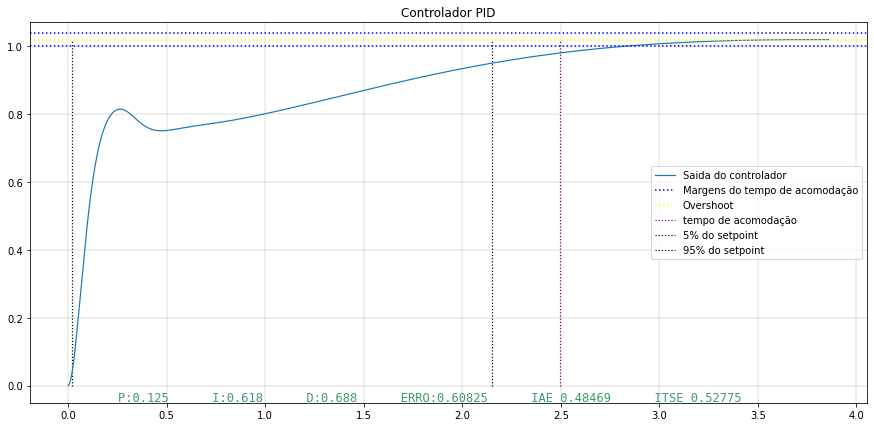

primeira_parcela (overshooting):  0.027417385137486594
segunda_parcela (acomodação) 3.149
quarta parcela (ultimo erro) 2.2371815511235127e-10
quinta parcela (ITSE) 0.34856354643686477
Terceira parcela:  8.739924896953223e-05
primeira_parcela (overshooting):  0.029401233941547034
segunda_parcela (acomodação) 3.653
quarta parcela (ultimo erro) 1.6689078563558724e-08
quinta parcela (ITSE) 0.4151887688944402
Terceira parcela:  6.459219197616724e-05
primeira_parcela (overshooting):  2.03972402532606
segunda_parcela (acomodação) 14.884
quarta parcela (ultimo erro) 0.002186525552544616
quinta parcela (ITSE) 14.346298669681815
Terceira parcela:  0.0010920029600252317
primeira_parcela (overshooting):  3.417550805158374
segunda_parcela (acomodação) 18.224
quarta parcela (ultimo erro) 0.006445553818228755
quinta parcela (ITSE) 23.029124186677954
Terceira parcela:  0.003311212457132546
primeira_parcela (overshooting):  1.0809571246820555
segunda_parcela (acomodação) 13.176
quarta parcela (ultimo e

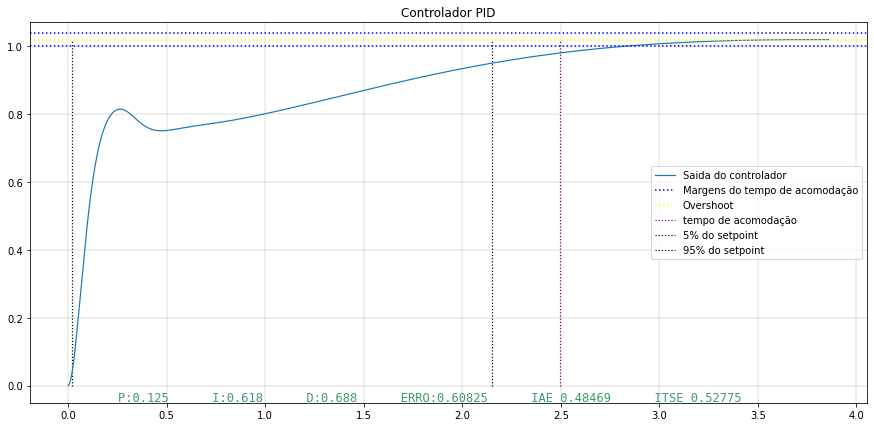

primeira_parcela (overshooting):  0.023795589699955322
segunda_parcela (acomodação) 3.322
quarta parcela (ultimo erro) 5.018094828557196e-10
quinta parcela (ITSE) 0.3763821203917202
Terceira parcela:  7.513186022207724e-05
primeira_parcela (overshooting):  0.024942874298060413
segunda_parcela (acomodação) 3.84
quarta parcela (ultimo erro) 3.2397257654359635e-08
quinta parcela (ITSE) 0.47513587587234485
Terceira parcela:  6.931573708448906e-05
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 18.736
quarta parcela (ultimo erro) 0.15594150196697676
quinta parcela (ITSE) 65.71221909914038
Terceira parcela:  0.002437768190678514
primeira_parcela (overshooting):  0.9853726128997597
segunda_parcela (acomodação) 19.990000000000002
quarta parcela (ultimo erro) 0.006030741800415962
quinta parcela (ITSE) 66.39726439978038
Terceira parcela:  0.0014821096710954157
primeira_parcela (overshooting):  3.553556715642377
segunda_parcela (acomodação) 19.982
quarta parcela (ultimo erro) 0.4

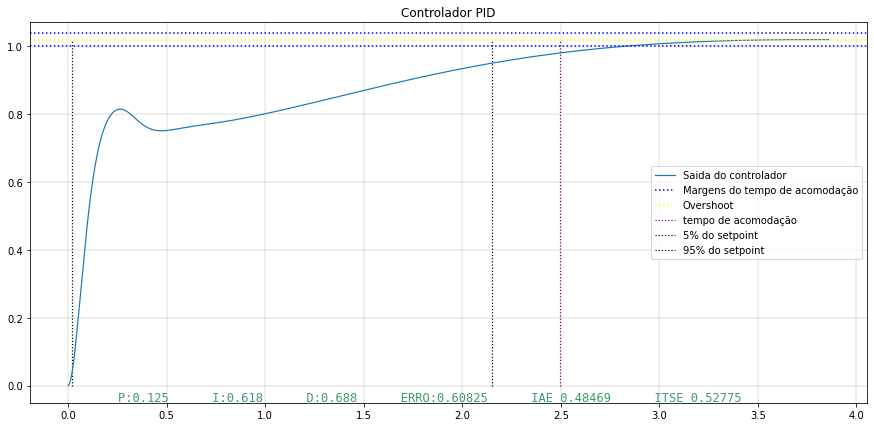

primeira_parcela (overshooting):  0.027819349963896123
segunda_parcela (acomodação) 3.1710000000000003
quarta parcela (ultimo erro) 4.979441303731846e-10
quinta parcela (ITSE) 0.31899376598600626
Terceira parcela:  6.625344598281076e-05
primeira_parcela (overshooting):  0.017937901111573007
segunda_parcela (acomodação) 2.724
quarta parcela (ultimo erro) 2.010033142152423e-07
quinta parcela (ITSE) 0.6303851447369844
Terceira parcela:  7.005233536311888e-05
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 18.884
quarta parcela (ultimo erro) 0.5013616312172954
quinta parcela (ITSE) 128.4560870713719
Terceira parcela:  0.004756940484228398
primeira_parcela (overshooting):  0.994449288911099
segunda_parcela (acomodação) 19.990000000000002
quarta parcela (ultimo erro) 0.08498818113035211
quinta parcela (ITSE) 67.26850596391711
Terceira parcela:  0.0015096505953399145
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 18.715
quarta parcela (ultimo erro) 0.1494191

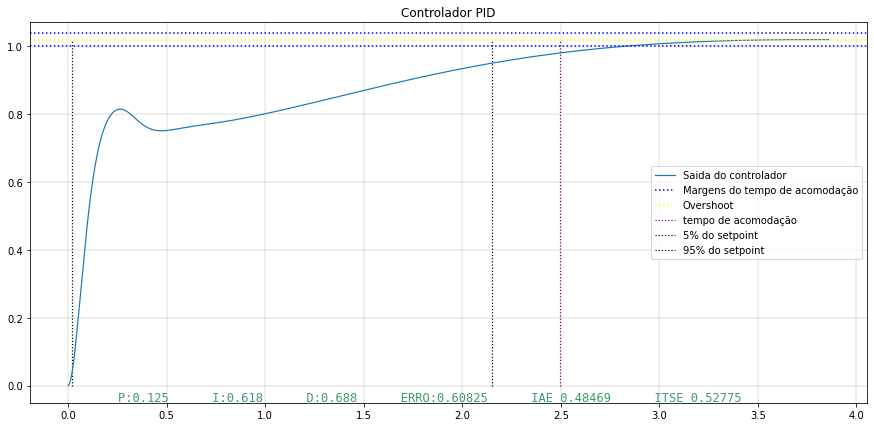

primeira_parcela (overshooting):  0.03730848175988388
segunda_parcela (acomodação) 2.832
quarta parcela (ultimo erro) 1.8475887486602005e-11
quinta parcela (ITSE) 0.2600088749218213
Terceira parcela:  6.554557855935376e-05
primeira_parcela (overshooting):  0.01716629240559331
segunda_parcela (acomodação) 2.9050000000000002
quarta parcela (ultimo erro) 4.121890673225437e-07
quinta parcela (ITSE) 0.6758369957446629
Terceira parcela:  6.43572956167721e-05
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 18.289
quarta parcela (ultimo erro) 0.7275063878469847
quinta parcela (ITSE) 162.15330336570543
Terceira parcela:  0.006385224167574771
primeira_parcela (overshooting):  0.994449288911099
segunda_parcela (acomodação) 19.990000000000002
quarta parcela (ultimo erro) 0.08498818113035211
quinta parcela (ITSE) 67.26850596391711
Terceira parcela:  0.0015096505953399145
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 18.31
quarta parcela (ultimo erro) 0.7234697420

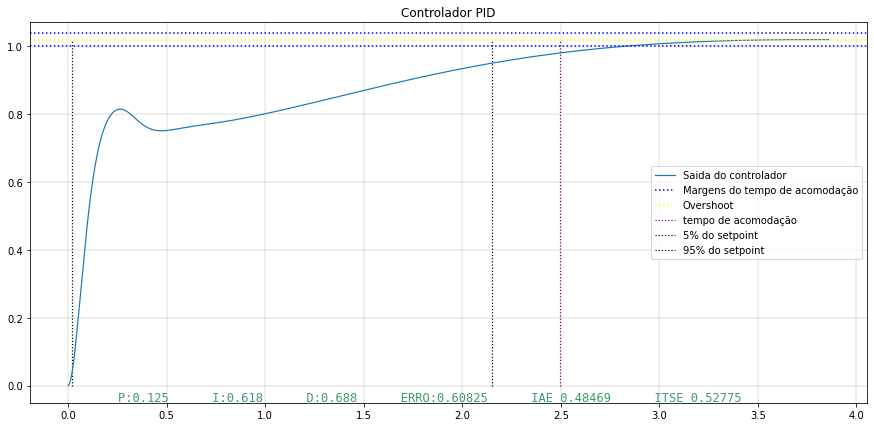

primeira_parcela (overshooting):  0.03722215942894036
segunda_parcela (acomodação) 2.707
quarta parcela (ultimo erro) 1.2974288310374504e-11
quinta parcela (ITSE) 0.24207465809879777
Terceira parcela:  6.932864137220365e-05
primeira_parcela (overshooting):  0.019394589917487215
segunda_parcela (acomodação) 2.593
quarta parcela (ultimo erro) 1.469610166893176e-08
quinta parcela (ITSE) 0.554644295176217
Terceira parcela:  5.657521510639403e-05
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 18.183
quarta parcela (ultimo erro) 0.7465282573408232
quinta parcela (ITSE) 164.84477365130198
Terceira parcela:  0.0065164539890037705
primeira_parcela (overshooting):  0.0018778490239383938
segunda_parcela (acomodação) 4.6290000000000004
quarta parcela (ultimo erro) 4.97818719580323e-09
quinta parcela (ITSE) 2.352965540945361
Terceira parcela:  0.0005392387048079959
primeira_parcela (overshooting):  0.029111263958668365
segunda_parcela (acomodação) 13.804
quarta parcela (ultimo err

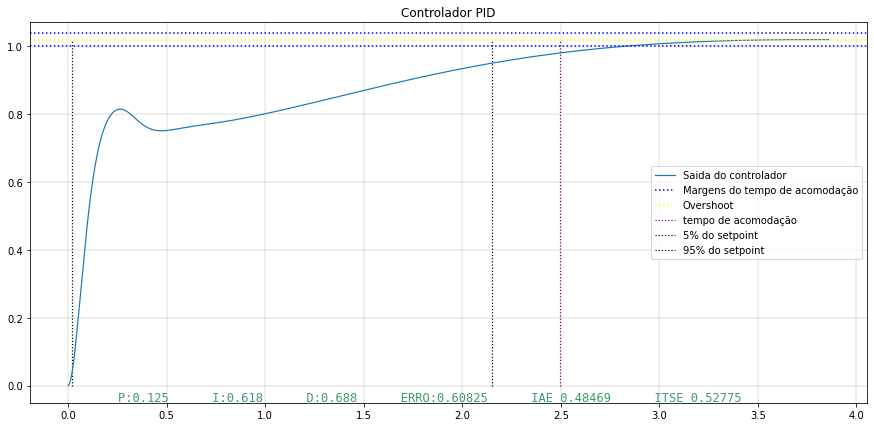

primeira_parcela (overshooting):  0.026258376814752404
segunda_parcela (acomodação) 2.979
quarta parcela (ultimo erro) 5.5500493090221426e-11
quinta parcela (ITSE) 0.29181988884362037
Terceira parcela:  7.055509403586178e-05
primeira_parcela (overshooting):  0.021315383943206756
segunda_parcela (acomodação) 3.762
quarta parcela (ultimo erro) 7.263322365780311e-08
quinta parcela (ITSE) 0.44489657271813315
Terceira parcela:  5.3146098074141936e-05
primeira_parcela (overshooting):  0.31125343696918484
segunda_parcela (acomodação) 9.338000000000001
quarta parcela (ultimo erro) 0.0017410902988015398
quinta parcela (ITSE) 2.3680840208152105
Terceira parcela:  4.82919498006779e-05
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 18.937
quarta parcela (ultimo erro) 0.43877352121343793
quinta parcela (ITSE) 118.42515557660141
Terceira parcela:  0.00432583387949594
primeira_parcela (overshooting):  0.13983962957986984
segunda_parcela (acomodação) 13.771
quarta parcela (ultimo err

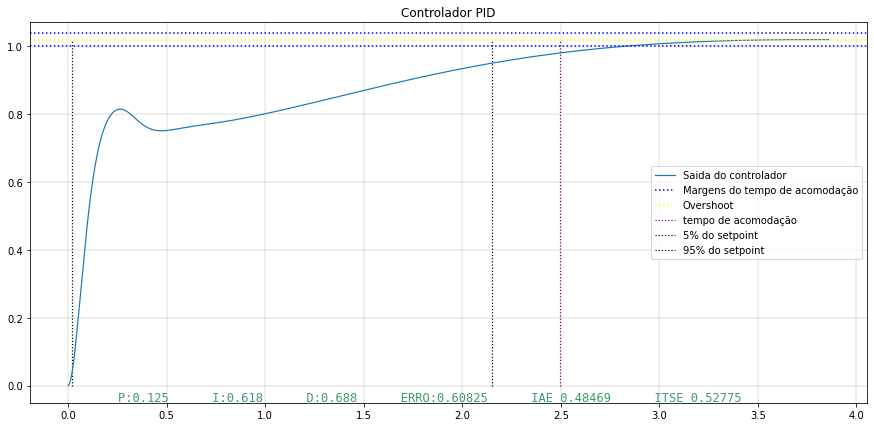

primeira_parcela (overshooting):  0.022025969667490486
segunda_parcela (acomodação) 3.207
quarta parcela (ultimo erro) 6.991862644412095e-10
quinta parcela (ITSE) 0.35177313875328514
Terceira parcela:  6.804087684797663e-05
primeira_parcela (overshooting):  0.0198698594762996
segunda_parcela (acomodação) 2.2800000000000002
quarta parcela (ultimo erro) 5.5286843769764005e-08
quinta parcela (ITSE) 0.44237691254331946
Terceira parcela:  5.494492365279067e-05
primeira_parcela (overshooting):  0.6352434845868999
segunda_parcela (acomodação) 7.882000000000001
quarta parcela (ultimo erro) 1.2565139121845093e-05
quinta parcela (ITSE) 2.5635523743653805
Terceira parcela:  9.088516775349701e-05
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 18.787
quarta parcela (ultimo erro) 0.569042947754518
quinta parcela (ITSE) 138.89944002171785
Terceira parcela:  0.00523623345724557
primeira_parcela (overshooting):  0.27772258340394274
segunda_parcela (acomodação) 10.844
quarta parcela (u

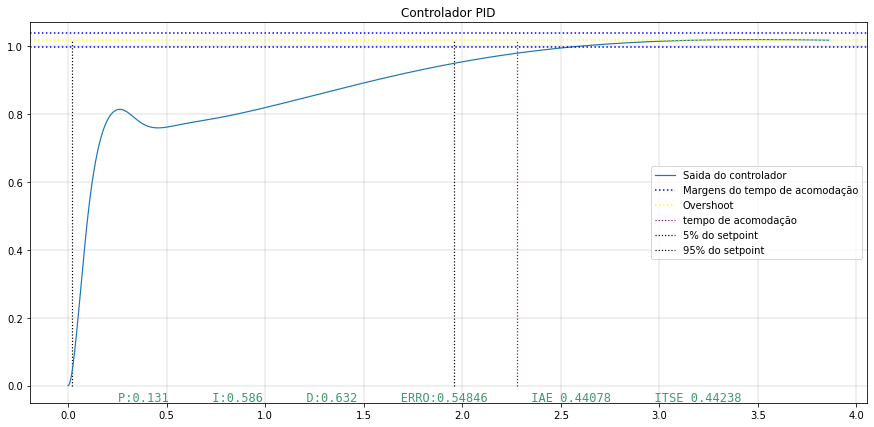

primeira_parcela (overshooting):  0.02668321877719837
segunda_parcela (acomodação) 3.223
quarta parcela (ultimo erro) 1.3145420307836275e-09
quinta parcela (ITSE) 0.32577144674425207
Terceira parcela:  6.355630299904125e-05
primeira_parcela (overshooting):  0.018736068886591406
segunda_parcela (acomodação) 2.295
quarta parcela (ultimo erro) 4.033080158727387e-08
quinta parcela (ITSE) 0.43972705304157983
Terceira parcela:  5.634663248190082e-05
primeira_parcela (overshooting):  0.6152333065221789
segunda_parcela (acomodação) 5.534
quarta parcela (ultimo erro) 2.2845910186974905e-05
quinta parcela (ITSE) 1.5532297665923855
Terceira parcela:  9.085332753052102e-05
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 18.942
quarta parcela (ultimo erro) 0.42912299722427005
quinta parcela (ITSE) 116.8556517216227
Terceira parcela:  0.004258558407683508
primeira_parcela (overshooting):  0.2808506649275564
segunda_parcela (acomodação) 7.46
quarta parcela (ultimo erro) 0.00020602876

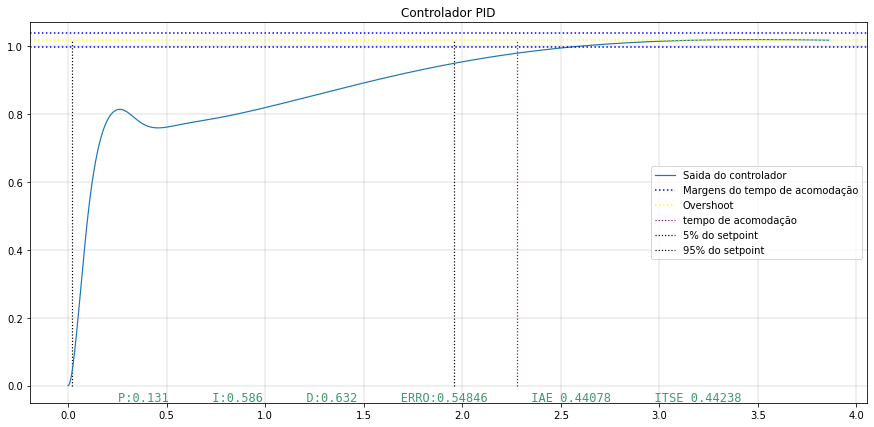

primeira_parcela (overshooting):  0.034759263412347696
segunda_parcela (acomodação) 2.942
quarta parcela (ultimo erro) 1.8020507308591505e-10
quinta parcela (ITSE) 0.2722174223469278
Terceira parcela:  6.177826742397239e-05
primeira_parcela (overshooting):  0.019204410933450378
segunda_parcela (acomodação) 2.2800000000000002
quarta parcela (ultimo erro) 4.371396311597664e-08
quinta parcela (ITSE) 0.4381296346810838
Terceira parcela:  5.584463578734836e-05
primeira_parcela (overshooting):  0.06169389368611955
segunda_parcela (acomodação) 1.216
quarta parcela (ultimo erro) 7.327471962526033e-15
quinta parcela (ITSE) 0.05155599008620298
Terceira parcela:  4.0417344581422094e-05
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 18.402
quarta parcela (ultimo erro) 0.0923053544407193
quinta parcela (ITSE) 50.15853345006701
Terceira parcela:  0.001988878624366716
primeira_parcela (overshooting):  0.016200252150282868
segunda_parcela (acomodação) 1.756
quarta parcela (ultimo err

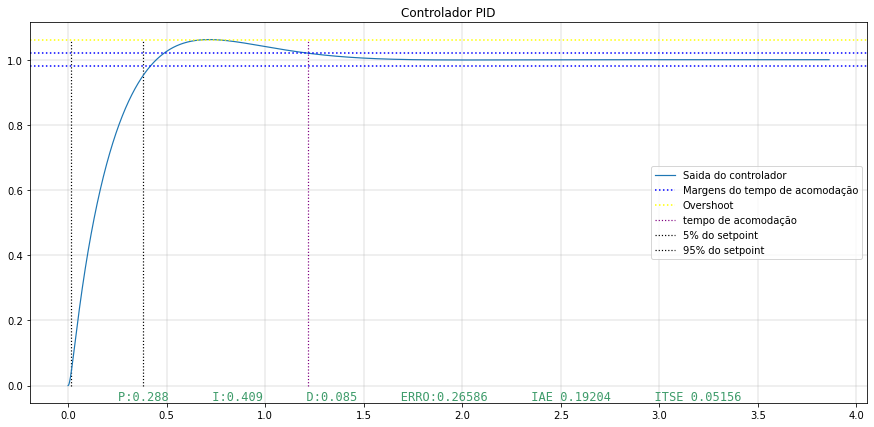

primeira_parcela (overshooting):  0.053823109779503886
segunda_parcela (acomodação) 1.968
quarta parcela (ultimo erro) 6.217248937900877e-15
quinta parcela (ITSE) 0.13336153105512033
Terceira parcela:  5.149463775855776e-05
primeira_parcela (overshooting):  0.015491109146367421
segunda_parcela (acomodação) 1.792
quarta parcela (ultimo erro) 1.0976032305265448e-09
quinta parcela (ITSE) 0.22045011980756915
Terceira parcela:  3.7158892571127285e-05
primeira_parcela (overshooting):  0.13771554558331012
segunda_parcela (acomodação) 0.853
quarta parcela (ultimo erro) 5.773159728050814e-15
quinta parcela (ITSE) 0.05146429872963071
Terceira parcela:  5.922971226900002e-05
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 9.633000000000001
quarta parcela (ultimo erro) 0.00019489412558226782
quinta parcela (ITSE) 7.2676572959673615
Terceira parcela:  0.0007859734891136296
primeira_parcela (overshooting):  0.2594132311793975
segunda_parcela (acomodação) 1.508
quarta parcela (ultimo

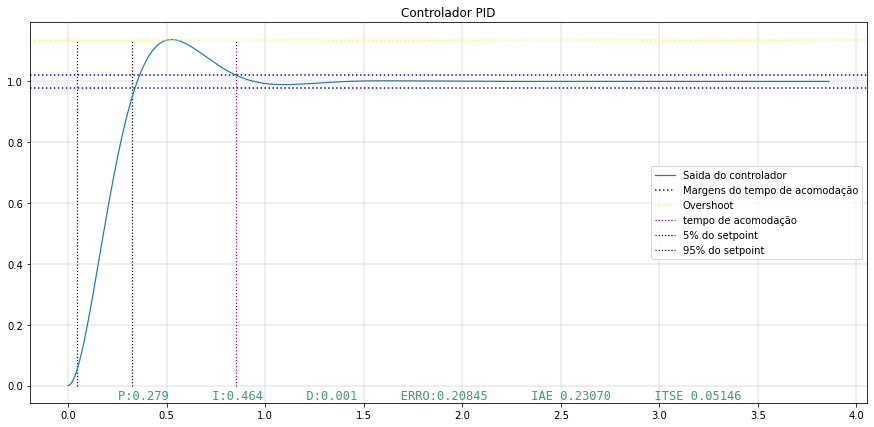

primeira_parcela (overshooting):  0.1786980347071565
segunda_parcela (acomodação) 0.987
quarta parcela (ultimo erro) 4.218847493575595e-15
quinta parcela (ITSE) 0.07564900394061243
Terceira parcela:  6.591430300326235e-05
primeira_parcela (overshooting):  0.02271214222861806
segunda_parcela (acomodação) 1.7630000000000001
quarta parcela (ultimo erro) 3.042011087472929e-14
quinta parcela (ITSE) 0.08229975150722903
Terceira parcela:  3.241622922821882e-05
primeira_parcela (overshooting):  0.1121675365730026
segunda_parcela (acomodação) 0.842
quarta parcela (ultimo erro) 9.769962616701378e-15
quinta parcela (ITSE) 0.047273362394971645
Terceira parcela:  5.991605354232376e-05
primeira_parcela (overshooting):  0.21076648215990468
segunda_parcela (acomodação) 3.454
quarta parcela (ultimo erro) 8.794531769495961e-11
quinta parcela (ITSE) 0.6004237712575952
Terceira parcela:  0.00017327920396807835
primeira_parcela (overshooting):  0.3249633292543832
segunda_parcela (acomodação) 1.352
quarta p

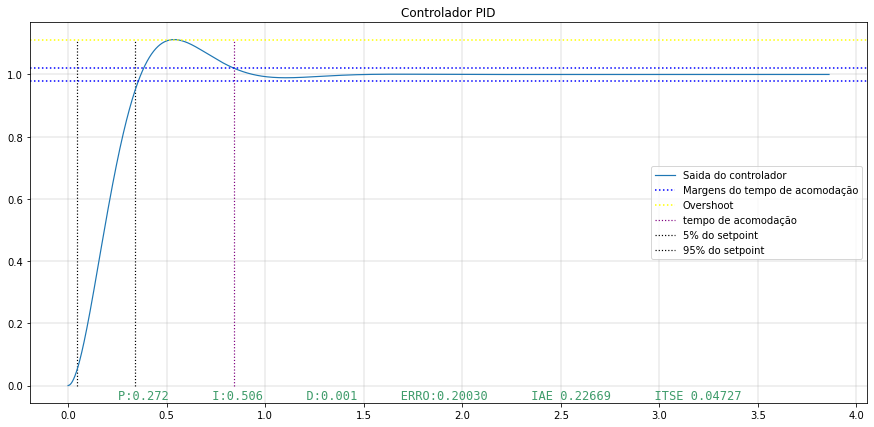

primeira_parcela (overshooting):  0.18019410966708738
segunda_parcela (acomodação) 0.841
quarta parcela (ultimo erro) 2.886579864025407e-15
quinta parcela (ITSE) 0.05767986093609987
Terceira parcela:  5.8200132449999134e-05
primeira_parcela (overshooting):  0.14088483842634925
segunda_parcela (acomodação) 0.923
quarta parcela (ultimo erro) 1.3322676295501878e-14
quinta parcela (ITSE) 0.052322012427428684
Terceira parcela:  5.258435045053106e-05
primeira_parcela (overshooting):  0.09462041175128832
segunda_parcela (acomodação) 0.8260000000000001
quarta parcela (ultimo erro) 1.354472090042691e-14
quinta parcela (ITSE) 0.04660415365101929
Terceira parcela:  6.058906479906648e-05
primeira_parcela (overshooting):  0.08314058351246922
segunda_parcela (acomodação) 1.552
quarta parcela (ultimo erro) 3.1530333899354446e-14
quinta parcela (ITSE) 0.1210500708825319
Terceira parcela:  9.472440376657688e-05
primeira_parcela (overshooting):  0.23960492201918004
segunda_parcela (acomodação) 1.184
qua

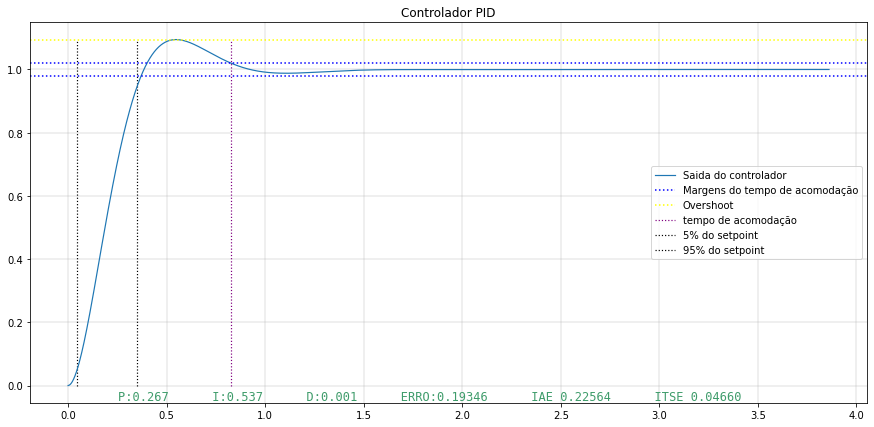

primeira_parcela (overshooting):  0.1504869959835311
segunda_parcela (acomodação) 0.749
quarta parcela (ultimo erro) 9.547918011776346e-15
quinta parcela (ITSE) 0.044379927683773454
Terceira parcela:  5.3958436351164634e-05
primeira_parcela (overshooting):  0.17935383719472808
segunda_parcela (acomodação) 0.774
quarta parcela (ultimo erro) 3.1086244689504383e-15
quinta parcela (ITSE) 0.05076285632756243
Terceira parcela:  5.479243648461081e-05
primeira_parcela (overshooting):  0.0822235306988417
segunda_parcela (acomodação) 0.812
quarta parcela (ultimo erro) 1.6653345369377348e-14
quinta parcela (ITSE) 0.0477782379613518
Terceira parcela:  6.117560393573124e-05
primeira_parcela (overshooting):  0.036249006229446934
segunda_parcela (acomodação) 0.749
quarta parcela (ultimo erro) 2.6867397195928788e-14
quinta parcela (ITSE) 0.06114261282181485
Terceira parcela:  6.620543990589496e-05
primeira_parcela (overshooting):  0.1462615367066511
segunda_parcela (acomodação) 0.777
quarta parcela (u

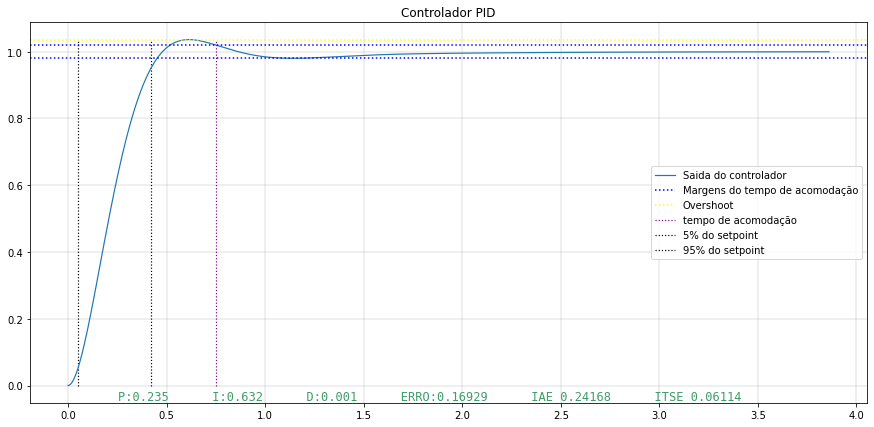

primeira_parcela (overshooting):  0.1024063979598333
segunda_parcela (acomodação) 1.053
quarta parcela (ultimo erro) 2.0650148258027912e-14
quinta parcela (ITSE) 0.046864026006684135
Terceira parcela:  5.354547525517577e-05
primeira_parcela (overshooting):  0.12628911019449252
segunda_parcela (acomodação) 0.727
quarta parcela (ultimo erro) 1.7985612998927536e-14
quinta parcela (ITSE) 0.04216325014655466
Terceira parcela:  5.384375836523099e-05
primeira_parcela (overshooting):  0.05678097235218482
segunda_parcela (acomodação) 0.774
quarta parcela (ultimo erro) 2.298161660974074e-14
quinta parcela (ITSE) 0.053759750394512945
Terceira parcela:  6.298756670770387e-05
primeira_parcela (overshooting):  0.04289553541334068
segunda_parcela (acomodação) 1.421
quarta parcela (ultimo erro) 1.808242444667485e-11
quinta parcela (ITSE) 0.09193293314388969
Terceira parcela:  5.5829940024160356e-05
primeira_parcela (overshooting):  0.07483031733949308
segunda_parcela (acomodação) 1.1440000000000001
qu

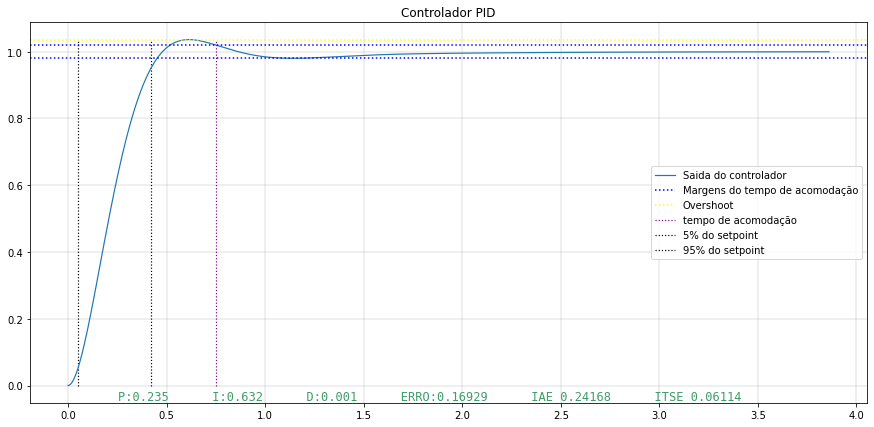

primeira_parcela (overshooting):  0.08589294747031717
segunda_parcela (acomodação) 1.086
quarta parcela (ultimo erro) 2.453592884421596e-14
quinta parcela (ITSE) 0.049557335794809663
Terceira parcela:  5.614493087956563e-05
primeira_parcela (overshooting):  0.07128767099854083
segunda_parcela (acomodação) 1.157
quarta parcela (ultimo erro) 4.141131881851834e-14
quinta parcela (ITSE) 0.056678605217524644
Terceira parcela:  5.636992017867035e-05
primeira_parcela (overshooting):  0.032185637625033126
segunda_parcela (acomodação) 1.2690000000000001
quarta parcela (ultimo erro) 6.727951529228449e-14
quinta parcela (ITSE) 0.06536711784734511
Terceira parcela:  6.553251684915907e-05
primeira_parcela (overshooting):  0.07622613046308024
segunda_parcela (acomodação) 1.168
quarta parcela (ultimo erro) 6.648015471455437e-13
quinta parcela (ITSE) 0.06493762525342019
Terceira parcela:  5.264722224358828e-05
primeira_parcela (overshooting):  0.0645864783584722
segunda_parcela (acomodação) 1.16
quart

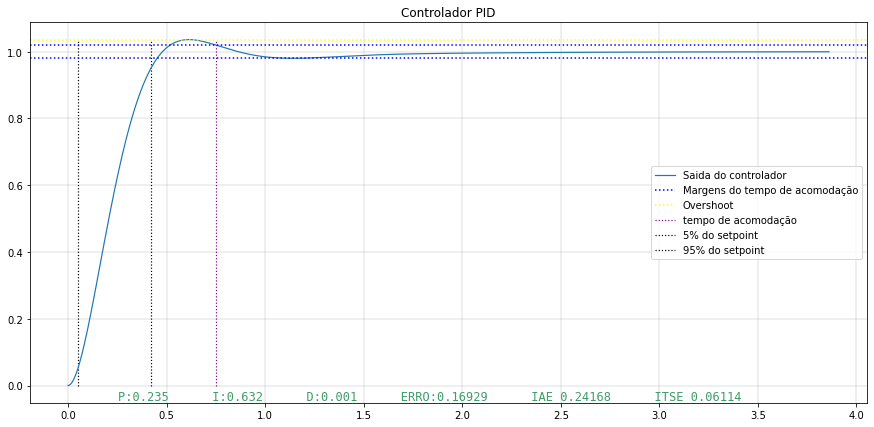

primeira_parcela (overshooting):  0.09916330466439427
segunda_parcela (acomodação) 0.8270000000000001
quarta parcela (ultimo erro) 1.2323475573339238e-14
quinta parcela (ITSE) 0.04627831735550611
Terceira parcela:  6.0209296130357444e-05
primeira_parcela (overshooting):  0.05485918123453182
segunda_parcela (acomodação) 1.19
quarta parcela (ultimo erro) 2.9753977059954195e-14
quinta parcela (ITSE) 0.05821287011350008
Terceira parcela:  6.055143642677035e-05
primeira_parcela (overshooting):  0.029192893378009455
segunda_parcela (acomodação) 1.244
quarta parcela (ultimo erro) 1.7985612998927536e-14
quinta parcela (ITSE) 0.0649867421654129
Terceira parcela:  6.714419315906472e-05
primeira_parcela (overshooting):  0.1172376346283488
segunda_parcela (acomodação) 0.738
quarta parcela (ultimo erro) 1.8207657603852567e-14
quinta parcela (ITSE) 0.043094558280146675
Terceira parcela:  5.4889057051019395e-05
primeira_parcela (overshooting):  0.10325302792879887
segunda_parcela (acomodação) 0.875
q

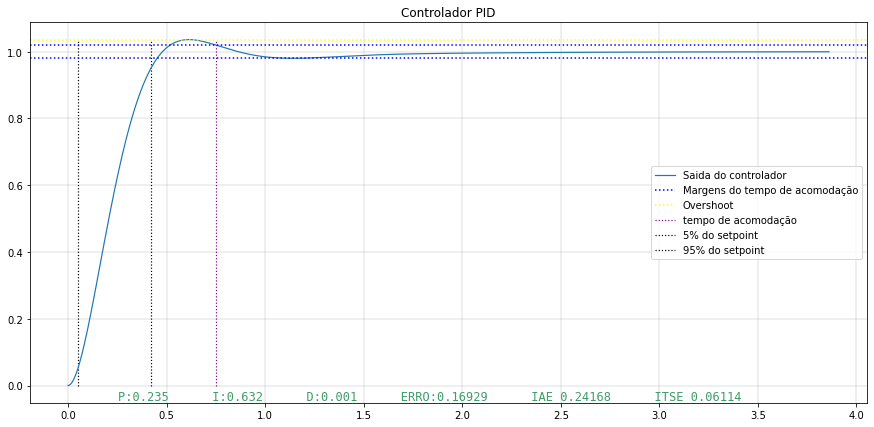

primeira_parcela (overshooting):  0.10863539947958079
segunda_parcela (acomodação) 0.931
quarta parcela (ultimo erro) 4.440892098500626e-15
quinta parcela (ITSE) 0.0539151645247472
Terceira parcela:  6.40827412561765e-05
primeira_parcela (overshooting):  0.07398114157141311
segunda_parcela (acomodação) 0.854
quarta parcela (ultimo erro) 1.3433698597964394e-14
quinta parcela (ITSE) 0.04934168772133071
Terceira parcela:  6.40665050656854e-05
primeira_parcela (overshooting):  0.04182243059217239
segunda_parcela (acomodação) 0.797
quarta parcela (ultimo erro) 2.1538326677728037e-14
quinta parcela (ITSE) 0.05687058594302689
Terceira parcela:  6.72247787889901e-05
primeira_parcela (overshooting):  0.10335252672131068
segunda_parcela (acomodação) 0.853
quarta parcela (ultimo erro) 9.325873406851315e-15
quinta parcela (ITSE) 0.047470108724798975
Terceira parcela:  6.102338112335308e-05
primeira_parcela (overshooting):  0.129205769378542
segunda_parcela (acomodação) 0.97
quarta parcela (ultimo 

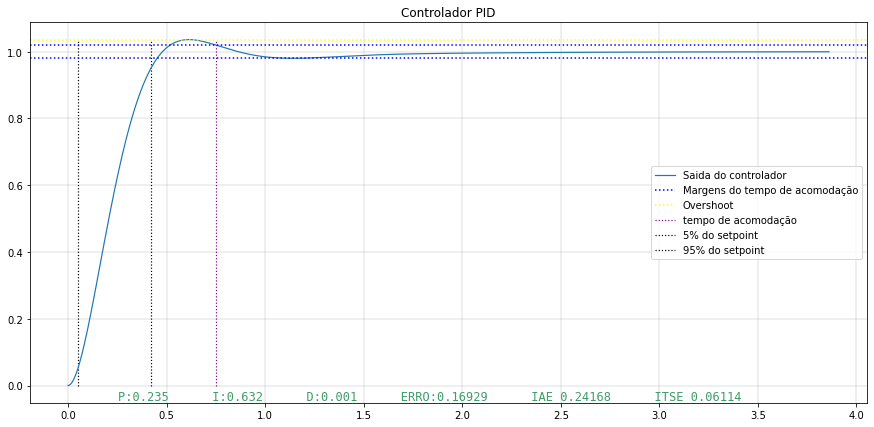

primeira_parcela (overshooting):  0.08308054991228642
segunda_parcela (acomodação) 0.917
quarta parcela (ultimo erro) 6.8833827526759706e-15
quinta parcela (ITSE) 0.05066315672834146
Terceira parcela:  6.57163115823289e-05
primeira_parcela (overshooting):  0.08706253892686089
segunda_parcela (acomodação) 0.924
quarta parcela (ultimo erro) 6.772360450213455e-15
quinta parcela (ITSE) 0.051167922982920985
Terceira parcela:  6.559248323726916e-05
primeira_parcela (overshooting):  0.049899600415437506
segunda_parcela (acomodação) 0.8180000000000001
quarta parcela (ultimo erro) 1.9206858326015208e-14
quinta parcela (ITSE) 0.05408910873785912
Terceira parcela:  6.642446196244115e-05
primeira_parcela (overshooting):  0.022445223049692098
segunda_parcela (acomodação) 0.727
quarta parcela (ultimo erro) 2.3647750424515834e-14
quinta parcela (ITSE) 0.06532142569513434
Terceira parcela:  7.083706110864555e-05
primeira_parcela (overshooting):  0.08876566747366987
segunda_parcela (acomodação) 0.921
q

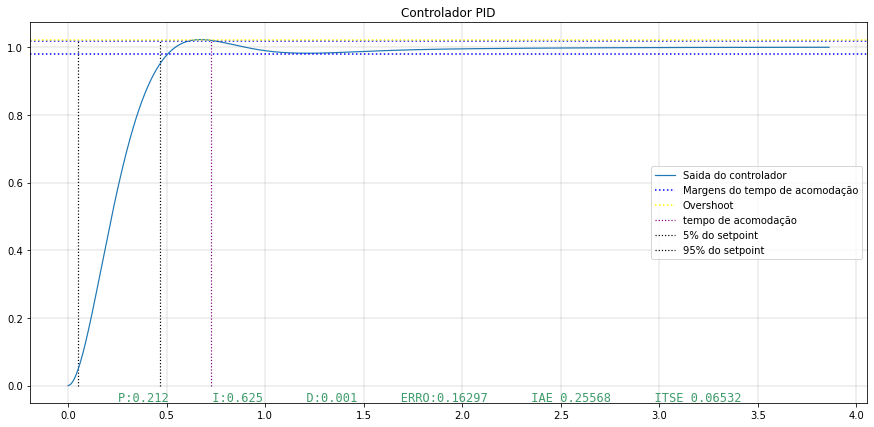

primeira_parcela (overshooting):  0.05800111035213451
segunda_parcela (acomodação) 0.839
quarta parcela (ultimo erro) 1.63202784619898e-14
quinta parcela (ITSE) 0.051969431912600735
Terceira parcela:  6.584231277238062e-05
primeira_parcela (overshooting):  0.06534435966217567
segunda_parcela (acomodação) 0.863
quarta parcela (ultimo erro) 1.3322676295501878e-14
quinta parcela (ITSE) 0.05072960015771663
Terceira parcela:  6.573878914095026e-05
primeira_parcela (overshooting):  0.042834603383709924
segunda_parcela (acomodação) 0.788
quarta parcela (ultimo erro) 2.2648549702353193e-14
quinta parcela (ITSE) 0.056950988302382356
Terceira parcela:  6.651853272895314e-05
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 1.81
quarta parcela (ultimo erro) 4.384714813454593e-12
quinta parcela (ITSE) 0.1420471205297291
Terceira parcela:  8.375904768644156e-05
primeira_parcela (overshooting):  0.053238984099336806
segunda_parcela (acomodação) 0.808
quarta parcela (ultimo erro) 2.042

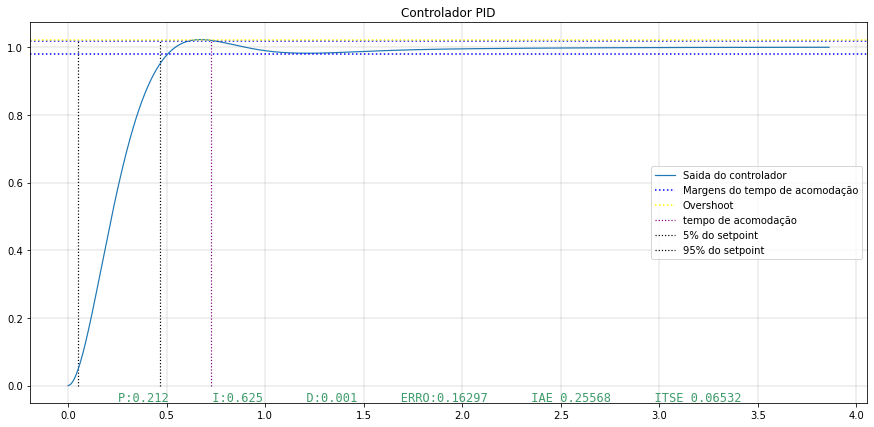

primeira_parcela (overshooting):  0.02982087165099423
segunda_parcela (acomodação) 1.209
quarta parcela (ultimo erro) 2.6867397195928788e-14
quinta parcela (ITSE) 0.0640546272088267
Terceira parcela:  6.741768139700973e-05
primeira_parcela (overshooting):  0.04779117300210434
segunda_parcela (acomodação) 0.775
quarta parcela (ultimo erro) 2.3869795029440866e-14
quinta parcela (ITSE) 0.05616661106013241
Terceira parcela:  6.47488819790949e-05
primeira_parcela (overshooting):  0.03349555177864061
segunda_parcela (acomodação) 0.751
quarta parcela (ultimo erro) 2.631228568361621e-14
quinta parcela (ITSE) 0.061750125045076376
Terceira parcela:  6.714271043897173e-05
primeira_parcela (overshooting):  0
segunda_parcela (acomodação) 1.718
quarta parcela (ultimo erro) 1.0054179711005418e-12
quinta parcela (ITSE) 0.13500678350937448
Terceira parcela:  8.78645555843351e-05
primeira_parcela (overshooting):  0.02246479001050594
segunda_parcela (acomodação) 1.341
quarta parcela (ultimo erro) 1.39110

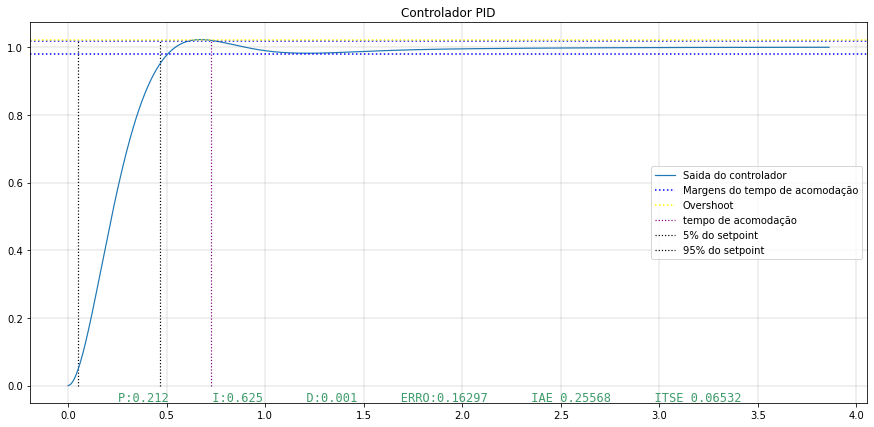

primeira_parcela (overshooting):  0.02666240278881471
segunda_parcela (acomodação) 0.737
quarta parcela (ultimo erro) 2.631228568361621e-14
quinta parcela (ITSE) 0.06435368857966761
Terceira parcela:  6.893983055643713e-05
primeira_parcela (overshooting):  0.029737067818723206
segunda_parcela (acomodação) 1.296
quarta parcela (ultimo erro) 6.628031457012185e-14
quinta parcela (ITSE) 0.0674524177279146
Terceira parcela:  6.557699699817463e-05
primeira_parcela (overshooting):  0.023927305320866843
segunda_parcela (acomodação) 1.2590000000000001
quarta parcela (ultimo erro) 2.5646151868841116e-14
quinta parcela (ITSE) 0.06708485579384212
Terceira parcela:  6.86073718775471e-05
primeira_parcela (overshooting):  0.008298524433251409
segunda_parcela (acomodação) 0.63
quarta parcela (ultimo erro) 1.6542323066914832e-14
quinta parcela (ITSE) 0.07068880151470536
Terceira parcela:  8.125894956159136e-05
primeira_parcela (overshooting):  0.022735861829527693
segunda_parcela (acomodação) 1.286
qua

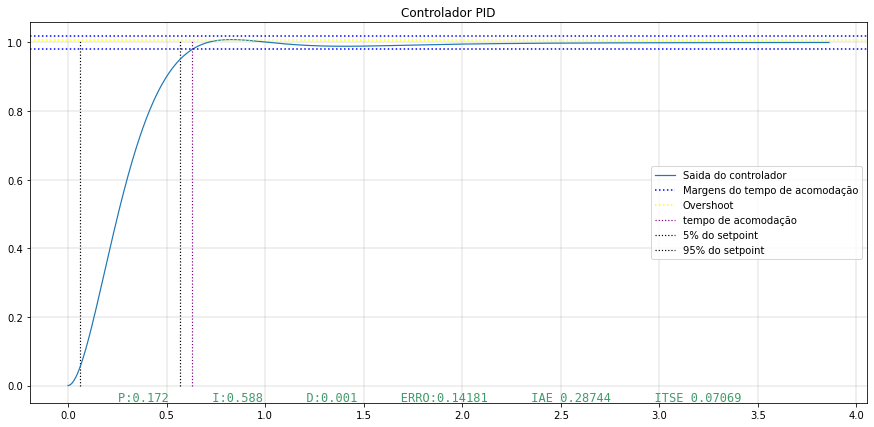

primeira_parcela (overshooting):  0.021533562062214573
segunda_parcela (acomodação) 0.749
quarta parcela (ultimo erro) 1.8984813721090177e-14
quinta parcela (ITSE) 0.06401705158630167
Terceira parcela:  7.303746848269473e-05
primeira_parcela (overshooting):  0.026490262564429656
segunda_parcela (acomodação) 0.739
quarta parcela (ultimo erro) 2.5757174171303632e-14
quinta parcela (ITSE) 0.0642188999251479
Terceira parcela:  6.914639792531593e-05
primeira_parcela (overshooting):  0.019554150133744397
segunda_parcela (acomodação) 0.522
quarta parcela (ultimo erro) 2.1760371282653068e-14
quinta parcela (ITSE) 0.06604717333671518
Terceira parcela:  7.232497555865658e-05
primeira_parcela (overshooting):  0.04249602279300624
segunda_parcela (acomodação) 1.016
quarta parcela (ultimo erro) 2.142730437526552e-14
quinta parcela (ITSE) 0.05963172517330717
Terceira parcela:  7.735123981633197e-05
primeira_parcela (overshooting):  0.04190001360396445
segunda_parcela (acomodação) 0.888
quarta parcela

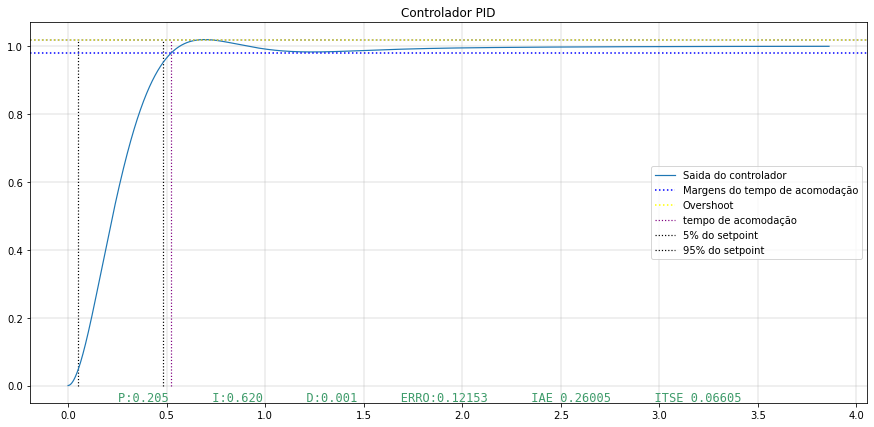

primeira_parcela (overshooting):  0.011770777082496187
segunda_parcela (acomodação) 0.5690000000000001
quarta parcela (ultimo erro) 1.8984813721090177e-14
quinta parcela (ITSE) 0.0695721739646385
Terceira parcela:  7.591888724396206e-05
primeira_parcela (overshooting):  0.023512963290654332
segunda_parcela (acomodação) 0.778
quarta parcela (ultimo erro) 1.787459069646502e-14
quinta parcela (ITSE) 0.06269193408616366
Terceira parcela:  7.312266762199018e-05
primeira_parcela (overshooting):  0.016736579814963237
segunda_parcela (acomodação) 0.556
quarta parcela (ultimo erro) 1.6653345369377348e-14
quinta parcela (ITSE) 0.06586803750354846
Terceira parcela:  7.550934938786751e-05
primeira_parcela (overshooting):  0.032086376715273035
segunda_parcela (acomodação) 0.884
quarta parcela (ultimo erro) 9.880984919163893e-15
quinta parcela (ITSE) 0.058648744907608984
Terceira parcela:  7.464092239875956e-05
primeira_parcela (overshooting):  0.04369811397787471
segunda_parcela (acomodação) 0.9410

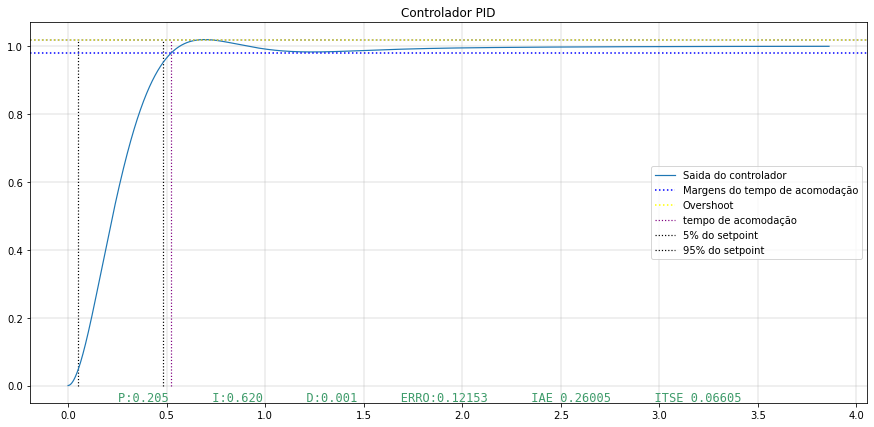

primeira_parcela (overshooting):  0.006215441248111908
segunda_parcela (acomodação) 0.593
quarta parcela (ultimo erro) 2.0317081350640365e-14
quinta parcela (ITSE) 0.07409906260788676
Terceira parcela:  7.720732368166625e-05
primeira_parcela (overshooting):  0.012937818330664763
segunda_parcela (acomodação) 0.5670000000000001
quarta parcela (ultimo erro) 1.8540724511240114e-14
quinta parcela (ITSE) 0.06855586676411114
Terceira parcela:  7.594062500525287e-05
primeira_parcela (overshooting):  0.010479279526463436
segunda_parcela (acomodação) 0.581
quarta parcela (ultimo erro) 1.7763568394002505e-14
quinta parcela (ITSE) 0.07011062103617091
Terceira parcela:  7.689121286112496e-05
primeira_parcela (overshooting):  0.011440053189656352
segunda_parcela (acomodação) 0.543
quarta parcela (ultimo erro) 2.0095036745715333e-14
quinta parcela (ITSE) 0.07236056796064035
Terceira parcela:  7.327432110869887e-05
primeira_parcela (overshooting):  0.02222037178131986
segunda_parcela (acomodação) 0.77

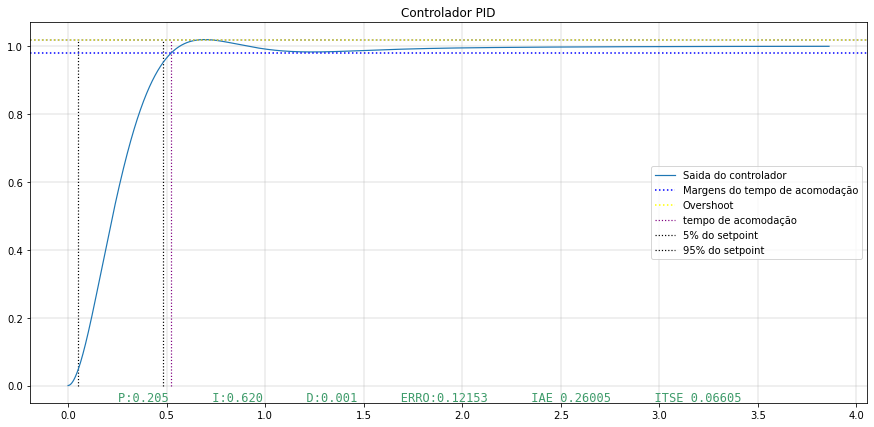

primeira_parcela (overshooting):  0.008154067747345728
segunda_parcela (acomodação) 0.581
quarta parcela (ultimo erro) 2.020605904817785e-14
quinta parcela (ITSE) 0.07260596224907273
Terceira parcela:  7.647165350724637e-05
primeira_parcela (overshooting):  0.006270082930492249
segunda_parcela (acomodação) 0.592
quarta parcela (ultimo erro) 2.0539125955565396e-14
quinta parcela (ITSE) 0.07406002625976445
Terceira parcela:  7.718069788286886e-05
primeira_parcela (overshooting):  0.006766280090509058
segunda_parcela (acomodação) 0.579
quarta parcela (ultimo erro) 1.8318679906315083e-14
quinta parcela (ITSE) 0.0744445383551624
Terceira parcela:  7.602328605641394e-05
primeira_parcela (overshooting):  0.001991564017965519
segunda_parcela (acomodação) 1.473
quarta parcela (ultimo erro) 4.18554080283684e-13
quinta parcela (ITSE) 0.08656290364129637
Terceira parcela:  7.20412190306929e-05
primeira_parcela (overshooting):  0.006542494935278809
segunda_parcela (acomodação) 1.344
quarta parcela 

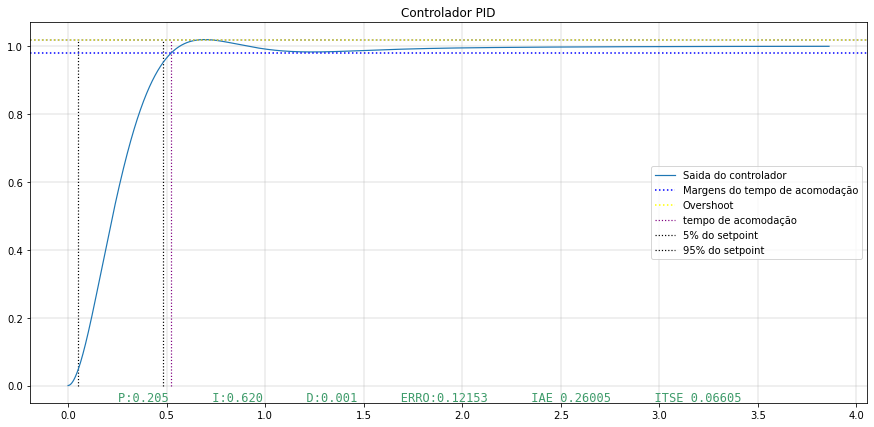

primeira_parcela (overshooting):  0.014807987858830973
segunda_parcela (acomodação) 0.551
quarta parcela (ultimo erro) 1.9761969838327786e-14
quinta parcela (ITSE) 0.0679109250747119
Terceira parcela:  7.461573800036933e-05
primeira_parcela (overshooting):  0.008392261827464553
segunda_parcela (acomodação) 0.58
quarta parcela (ultimo erro) 2.0317081350640365e-14
quinta parcela (ITSE) 0.07243040232077139
Terceira parcela:  7.638469127894377e-05
primeira_parcela (overshooting):  0.011726707083618226
segunda_parcela (acomodação) 0.547
quarta parcela (ultimo erro) 1.8318679906315083e-14
quinta parcela (ITSE) 0.07156362856412293
Terceira parcela:  7.371254068830518e-05
primeira_parcela (overshooting):  0.013262193956401713
segunda_parcela (acomodação) 1.344
quarta parcela (ultimo erro) 7.194245199571014e-14
quinta parcela (ITSE) 0.07390971038083664
Terceira parcela:  7.085866227085123e-05
primeira_parcela (overshooting):  0.013361730697961871
segunda_parcela (acomodação) 0.536
quarta parcel

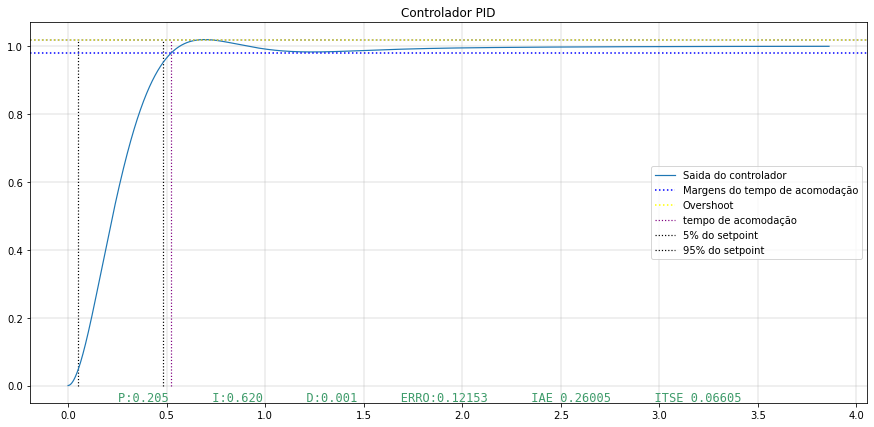

primeira_parcela (overshooting):  0.020791104631556756
segunda_parcela (acomodação) 0.73
quarta parcela (ultimo erro) 2.0317081350640365e-14
quinta parcela (ITSE) 0.06478155118713558
Terceira parcela:  7.270770261530393e-05
primeira_parcela (overshooting):  0.01609242183790527
segunda_parcela (acomodação) 0.548
quarta parcela (ultimo erro) 1.942890293094024e-14
quinta parcela (ITSE) 0.0669627536124182
Terceira parcela:  7.449488255496954e-05
primeira_parcela (overshooting):  0.02204155934676666
segunda_parcela (acomodação) 0.731
quarta parcela (ultimo erro) 2.2315482794965646e-14
quinta parcela (ITSE) 0.06500708529629767
Terceira parcela:  7.142847794218424e-05
primeira_parcela (overshooting):  0.029825898935330386
segunda_parcela (acomodação) 0.789
quarta parcela (ultimo erro) 1.9761969838327786e-14
quinta parcela (ITSE) 0.06063518123856216
Terceira parcela:  7.053748315773055e-05
primeira_parcela (overshooting):  0.021092907382688653
segunda_parcela (acomodação) 0.724
quarta parcela 

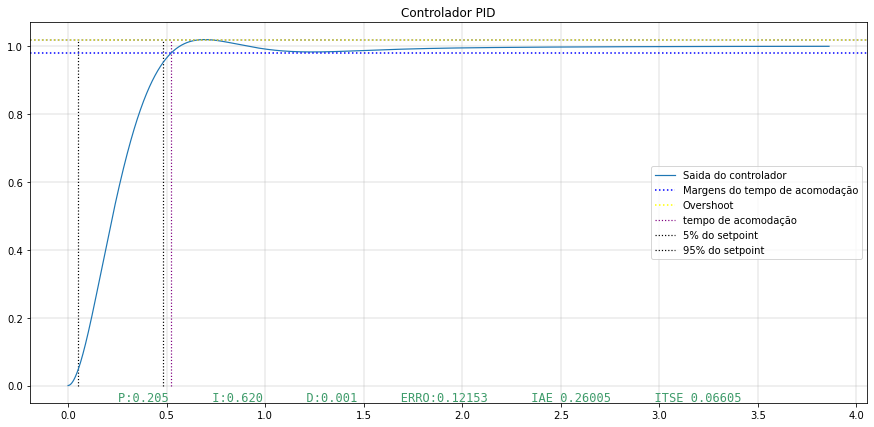

primeira_parcela (overshooting):  0.023229336035451853
segunda_parcela (acomodação) 0.748
quarta parcela (ultimo erro) 2.1316282072803006e-14
quinta parcela (ITSE) 0.0640229700042981
Terceira parcela:  7.155035638215868e-05
primeira_parcela (overshooting):  0.02234759947035503
segunda_parcela (acomodação) 0.755
quarta parcela (ultimo erro) 1.9539925233402755e-14
quinta parcela (ITSE) 0.06377309711269552
Terceira parcela:  7.260669202698242e-05
primeira_parcela (overshooting):  0.028955593857485473
segunda_parcela (acomodação) 0.776
quarta parcela (ultimo erro) 2.1094237467877974e-14
quinta parcela (ITSE) 0.061418374270514865
Terceira parcela:  7.019729196069835e-05
primeira_parcela (overshooting):  0.029419162136046006
segunda_parcela (acomodação) 0.803
quarta parcela (ultimo erro) 1.8096635301390052e-14
quinta parcela (ITSE) 0.06028628690079723
Terceira parcela:  7.143720863887721e-05
primeira_parcela (overshooting):  0.02166060381000734
segunda_parcela (acomodação) 0.729
quarta parce

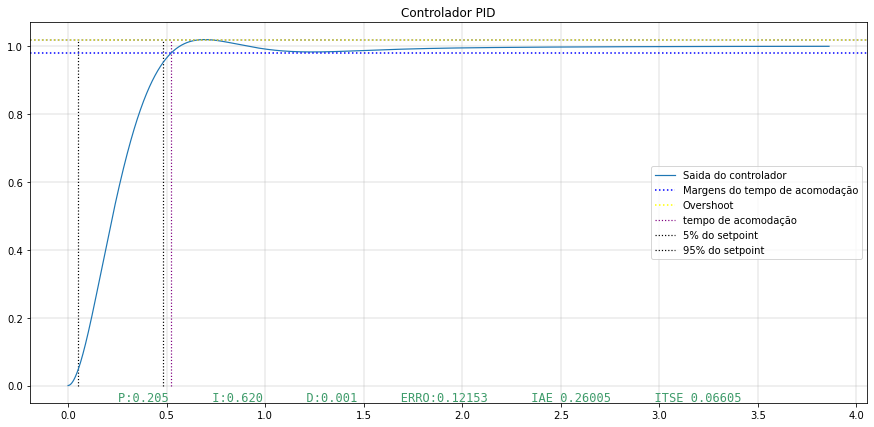

primeira_parcela (overshooting):  0.022896811053091826
segunda_parcela (acomodação) 0.741
quarta parcela (ultimo erro) 2.2093438190040615e-14
quinta parcela (ITSE) 0.06446907008595493
Terceira parcela:  7.132874443467264e-05
primeira_parcela (overshooting):  0.024091757603077246
segunda_parcela (acomodação) 0.757
quarta parcela (ultimo erro) 2.0761170560490427e-14
quinta parcela (ITSE) 0.06346601176725844
Terceira parcela:  7.150083381515023e-05
primeira_parcela (overshooting):  0.027757286257591218
segunda_parcela (acomodação) 0.768
quarta parcela (ultimo erro) 2.1760371282653068e-14
quinta parcela (ITSE) 0.06215045914193167
Terceira parcela:  7.022877005950425e-05
primeira_parcela (overshooting):  0.013692369696040263
segunda_parcela (acomodação) 0.537
quarta parcela (ultimo erro) 2.042810365310288e-14
quinta parcela (ITSE) 0.07040944091733022
Terceira parcela:  7.302548636054572e-05
primeira_parcela (overshooting):  0.016831849641719243
segunda_parcela (acomodação) 0.522
quarta parc

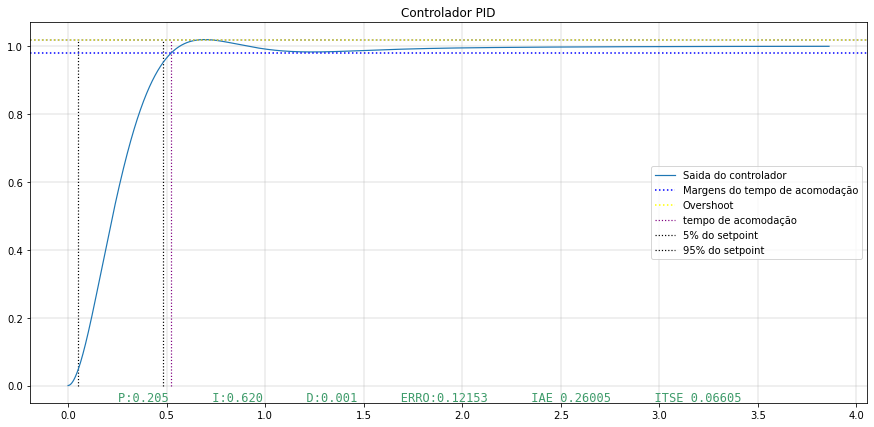

primeira_parcela (overshooting):  0.021497075518666753
segunda_parcela (acomodação) 0.73
quarta parcela (ultimo erro) 2.1760371282653068e-14
quinta parcela (ITSE) 0.06500778345836708
Terceira parcela:  7.185091903540615e-05
primeira_parcela (overshooting):  0.023121825434531562
segunda_parcela (acomodação) 0.743
quarta parcela (ultimo erro) 2.1871393585115584e-14
quinta parcela (ITSE) 0.06431595479855348
Terceira parcela:  7.131777512551088e-05
primeira_parcela (overshooting):  0.021953653958244335
segunda_parcela (acomodação) 0.726
quarta parcela (ultimo erro) 2.3203661214665772e-14
quinta parcela (ITSE) 0.06535056754082874
Terceira parcela:  7.116135711369629e-05
primeira_parcela (overshooting):  0.004630801709627486
segunda_parcela (acomodação) 1.372
quarta parcela (ultimo erro) 8.548717289613705e-14
quinta parcela (ITSE) 0.0792157032788392
Terceira parcela:  7.408765414950519e-05
primeira_parcela (overshooting):  0.01464577294174041
segunda_parcela (acomodação) 0.528
quarta parcela

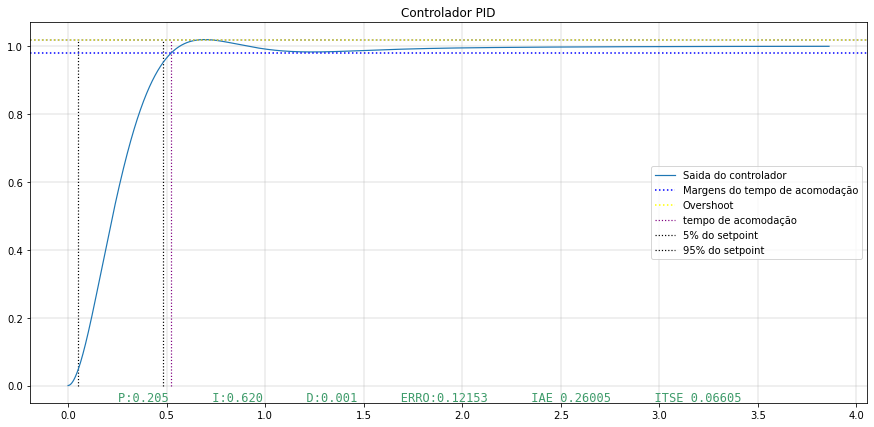

primeira_parcela (overshooting):  0.019714398171483127
segunda_parcela (acomodação) 0.526
quarta parcela (ultimo erro) 2.0761170560490427e-14
quinta parcela (ITSE) 0.06554630628525653
Terceira parcela:  7.274391661250231e-05
primeira_parcela (overshooting):  0.02182966689297694
segunda_parcela (acomodação) 0.735
quarta parcela (ultimo erro) 2.1760371282653068e-14
quinta parcela (ITSE) 0.06477020511148605
Terceira parcela:  7.184048035239088e-05
primeira_parcela (overshooting):  0.017583661414191987
segunda_parcela (acomodação) 0.525
quarta parcela (ultimo erro) 2.3092638912203256e-14
quinta parcela (ITSE) 0.06763728532384194
Terceira parcela:  7.234754825911983e-05
primeira_parcela (overshooting):  0.009140917428491324
segunda_parcela (acomodação) 0.554
quarta parcela (ultimo erro) 4.1744385725905886e-14
quinta parcela (ITSE) 0.07397159286015102
Terceira parcela:  7.396968703575394e-05
primeira_parcela (overshooting):  0.016440367136445477
segunda_parcela (acomodação) 0.527
quarta parc

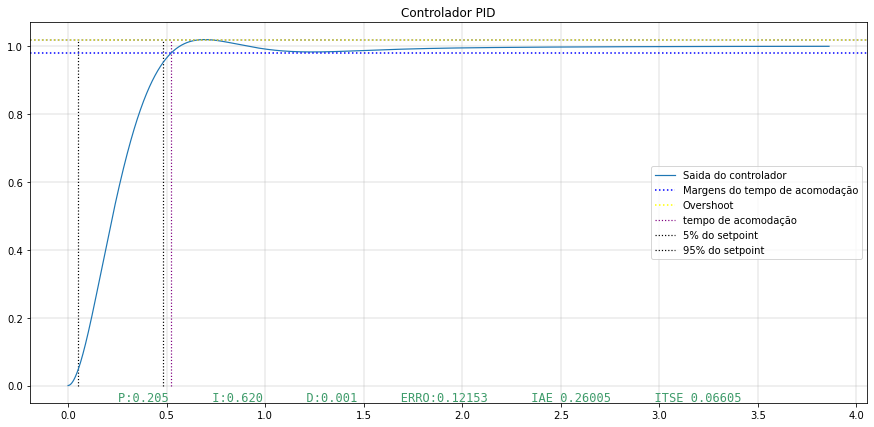

primeira_parcela (overshooting):  0.018096452172943867
segunda_parcela (acomodação) 0.534
quarta parcela (ultimo erro) 2.0317081350640365e-14
quinta parcela (ITSE) 0.06629649940360348
Terceira parcela:  7.332590135446113e-05
primeira_parcela (overshooting):  0.020578290237885044
segunda_parcela (acomodação) 0.725
quarta parcela (ultimo erro) 2.0539125955565396e-14
quinta parcela (ITSE) 0.06493635358744376
Terceira parcela:  7.27069633223592e-05
primeira_parcela (overshooting):  0.016788291762439345
segunda_parcela (acomodação) 0.534
quarta parcela (ultimo erro) 2.142730437526552e-14
quinta parcela (ITSE) 0.06745934052116899
Terceira parcela:  7.319984353065318e-05
primeira_parcela (overshooting):  0.018553473350656935
segunda_parcela (acomodação) 0.532
quarta parcela (ultimo erro) 2.0761170560490427e-14
quinta parcela (ITSE) 0.06604905279502812
Terceira parcela:  7.319705707533632e-05
primeira_parcela (overshooting):  0.01858517712799279
segunda_parcela (acomodação) 0.524
quarta parcel

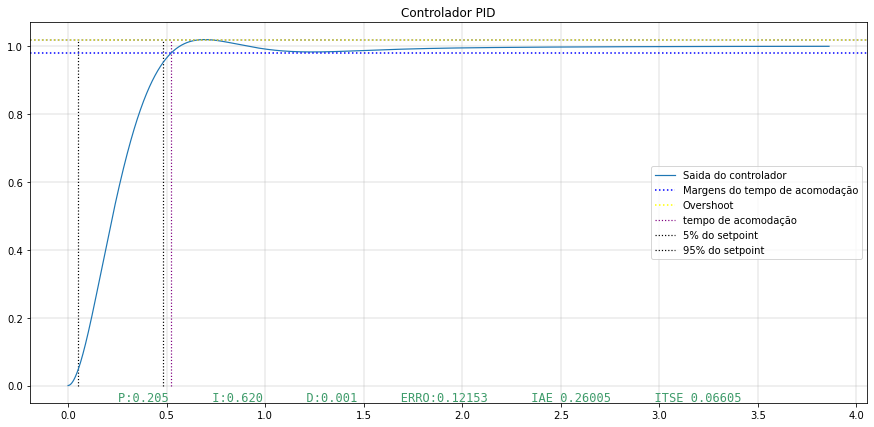

primeira_parcela (overshooting):  0.017224178246829647
segunda_parcela (acomodação) 0.536
quarta parcela (ultimo erro) 2.0761170560490427e-14
quinta parcela (ITSE) 0.06691206826388689
Terceira parcela:  7.341478267976105e-05
primeira_parcela (overshooting):  0.018734050428791393
segunda_parcela (acomodação) 0.535
quarta parcela (ultimo erro) 1.965094753586527e-14
quinta parcela (ITSE) 0.06565279900333613
Terceira parcela:  7.35263634404661e-05
primeira_parcela (overshooting):  0.017562758639942277
segunda_parcela (acomodação) 0.536
quarta parcela (ultimo erro) 2.0650148258027912e-14
quinta parcela (ITSE) 0.06659397073531993
Terceira parcela:  7.347069305103656e-05
primeira_parcela (overshooting):  0.02589091810727573
segunda_parcela (acomodação) 0.79
quarta parcela (ultimo erro) 1.7985612998927536e-14
quinta parcela (ITSE) 0.06168095254546622
Terceira parcela:  7.242128422473338e-05
primeira_parcela (overshooting):  0.018081596686864154
segunda_parcela (acomodação) 0.525
quarta parcela

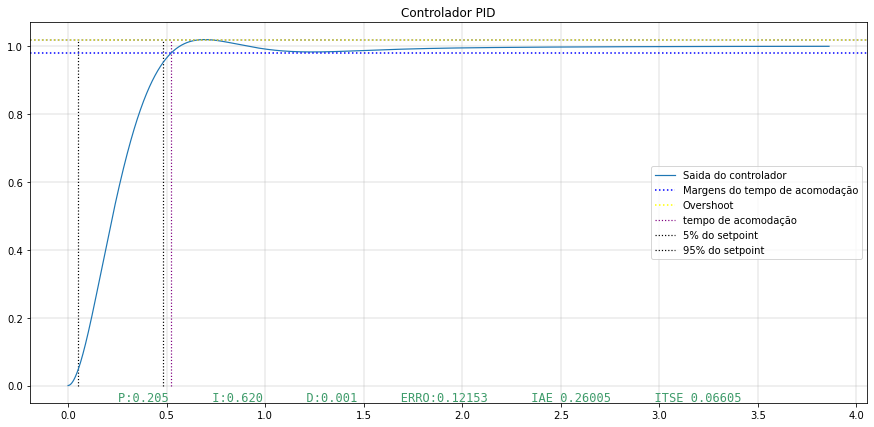

primeira_parcela (overshooting):  0.017818865787001537
segunda_parcela (acomodação) 0.532
quarta parcela (ultimo erro) 2.120525977034049e-14
quinta parcela (ITSE) 0.06673497709551934
Terceira parcela:  7.307106413115036e-05
primeira_parcela (overshooting):  0.01711034102446396
segunda_parcela (acomodação) 0.54
quarta parcela (ultimo erro) 1.9761969838327786e-14
quinta parcela (ITSE) 0.06665686578976444
Terceira parcela:  7.383515528668679e-05
primeira_parcela (overshooting):  0.017810760822306593
segunda_parcela (acomodação) 0.533
quarta parcela (ultimo erro) 2.0761170560490427e-14
quinta parcela (ITSE) 0.06659993561161455
Terceira parcela:  7.32316700317959e-05
primeira_parcela (overshooting):  0.023880293258917273
segunda_parcela (acomodação) 0.765
quarta parcela (ultimo erro) 1.965094753586527e-14
quinta parcela (ITSE) 0.06312632478411906
Terceira parcela:  7.21012764504079e-05
primeira_parcela (overshooting):  0.01619329253781654
segunda_parcela (acomodação) 0.528
quarta parcela (u

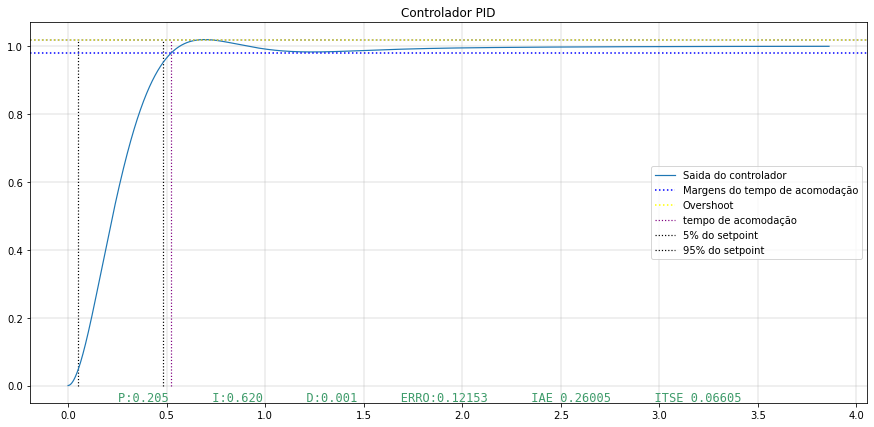

primeira_parcela (overshooting):  0.019602806579931187
segunda_parcela (acomodação) 0.524
quarta parcela (ultimo erro) 2.1094237467877974e-14
quinta parcela (ITSE) 0.06580776490690955
Terceira parcela:  7.254316957231833e-05
primeira_parcela (overshooting):  0.016996896109267245
segunda_parcela (acomodação) 0.538
quarta parcela (ultimo erro) 2.042810365310288e-14
quinta parcela (ITSE) 0.06694321181890997
Terceira parcela:  7.35917525584285e-05
primeira_parcela (overshooting):  0.01794808742164733
segunda_parcela (acomodação) 0.528
quarta parcela (ultimo erro) 2.220446049250313e-14
quinta parcela (ITSE) 0.06697336322021887
Terceira parcela:  7.270295923497227e-05
primeira_parcela (overshooting):  0.018439152545892012
segunda_parcela (acomodação) 0.522
quarta parcela (ultimo erro) 2.3203661214665772e-14
quinta parcela (ITSE) 0.06711805669214686
Terceira parcela:  7.21572151372143e-05
primeira_parcela (overshooting):  0.015756642080552385
segunda_parcela (acomodação) 0.527
quarta parcela 

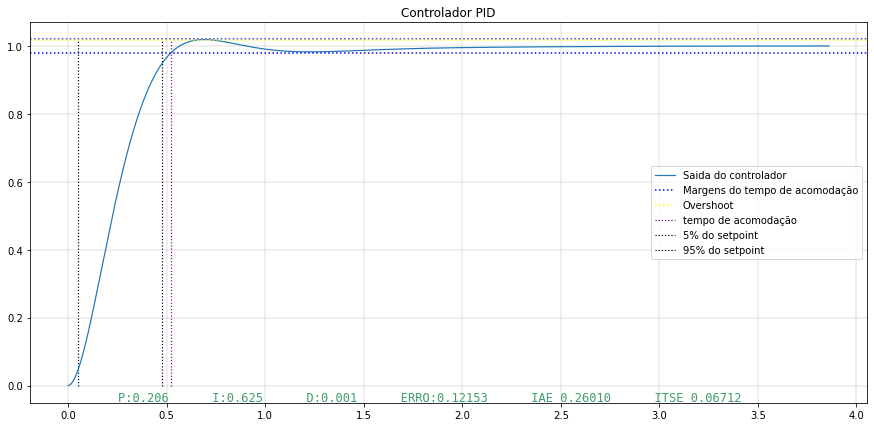

primeira_parcela (overshooting):  0.02022240851446644
segunda_parcela (acomodação) 0.705
quarta parcela (ultimo erro) 2.19824158875781e-14
quinta parcela (ITSE) 0.06577500774879848
Terceira parcela:  7.206465906573643e-05
primeira_parcela (overshooting):  0.018165111875094064
segunda_parcela (acomodação) 0.53
quarta parcela (ultimo erro) 2.120525977034049e-14
quinta parcela (ITSE) 0.06653895759532194
Terceira parcela:  7.298088331668199e-05
primeira_parcela (overshooting):  0.018587388584571762
segunda_parcela (acomodação) 0.522
quarta parcela (ultimo erro) 2.3203661214665772e-14
quinta parcela (ITSE) 0.06704917132005947
Terceira parcela:  7.21051653259862e-05
primeira_parcela (overshooting):  0.014521280108200196
segunda_parcela (acomodação) 0.528
quarta parcela (ultimo erro) 1.1879386363489175e-14
quinta parcela (ITSE) 0.07060195216531646
Terceira parcela:  7.220390801064858e-05
primeira_parcela (overshooting):  0.016653794334528405
segunda_parcela (acomodação) 0.524
quarta parcela (

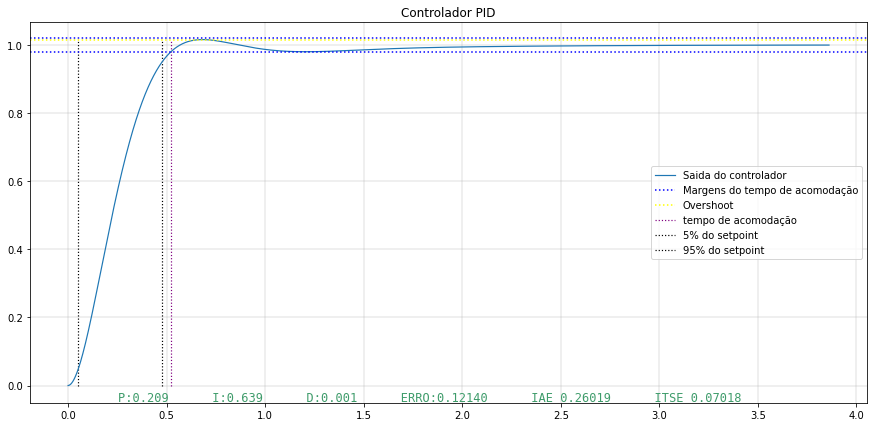

primeira_parcela (overshooting):  0.01890764968028935
segunda_parcela (acomodação) 0.517
quarta parcela (ultimo erro) 2.4091839634365897e-14
quinta parcela (ITSE) 0.0672477299902598
Terceira parcela:  7.167801844785673e-05
primeira_parcela (overshooting):  0.017243748267648185
segunda_parcela (acomodação) 0.524
quarta parcela (ultimo erro) 2.375877272697835e-14
quinta parcela (ITSE) 0.0680862847827673
Terceira parcela:  7.22052349690808e-05
primeira_parcela (overshooting):  0.017561333026802295
segunda_parcela (acomodação) 0.518
quarta parcela (ultimo erro) 2.275957200481571e-14
quinta parcela (ITSE) 0.06855741537563584
Terceira parcela:  7.156515992890554e-05
primeira_parcela (overshooting):  0.015068980056470727
segunda_parcela (acomodação) 0.525
quarta parcela (ultimo erro) 1.2656542480726785e-14
quinta parcela (ITSE) 0.0703662358042314
Terceira parcela:  7.197350143343176e-05
primeira_parcela (overshooting):  0.01639577687937832
segunda_parcela (acomodação) 0.522
quarta parcela (ul

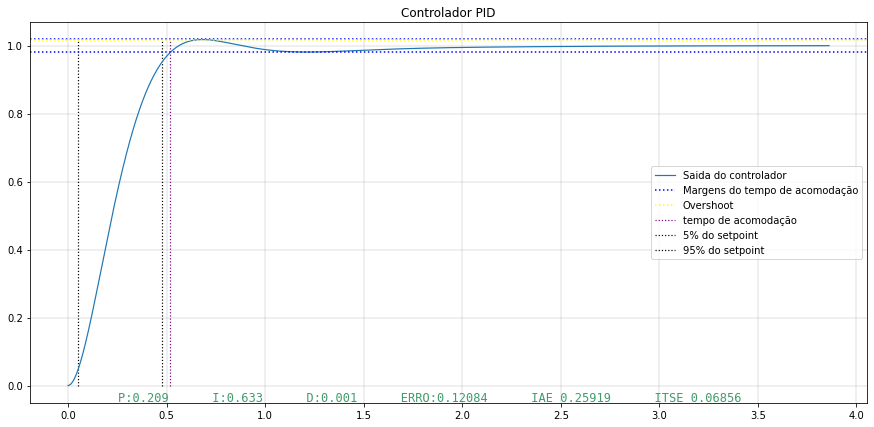

primeira_parcela (overshooting):  0.017319029656968077
segunda_parcela (acomodação) 0.517
quarta parcela (ultimo erro) 1.84297022087776e-14
quinta parcela (ITSE) 0.06902370605721653
Terceira parcela:  7.13723456914307e-05
primeira_parcela (overshooting):  0.01644996388049913
segunda_parcela (acomodação) 0.519
quarta parcela (ultimo erro) 1.2989609388114332e-14
quinta parcela (ITSE) 0.06969868290920385
Terceira parcela:  7.147607842277524e-05
primeira_parcela (overshooting):  0.016842607277915533
segunda_parcela (acomodação) 1.236
quarta parcela (ultimo erro) 2.0317081350640365e-14
quinta parcela (ITSE) 0.06974512658617052
Terceira parcela:  7.11674623096886e-05
primeira_parcela (overshooting):  0.016371903374801988
segunda_parcela (acomodação) 0.521
quarta parcela (ultimo erro) 1.709743457922741e-14
quinta parcela (ITSE) 0.06950219122654416
Terceira parcela:  7.168227737491688e-05
primeira_parcela (overshooting):  0.016580387768236227
segunda_parcela (acomodação) 0.519
quarta parcela (

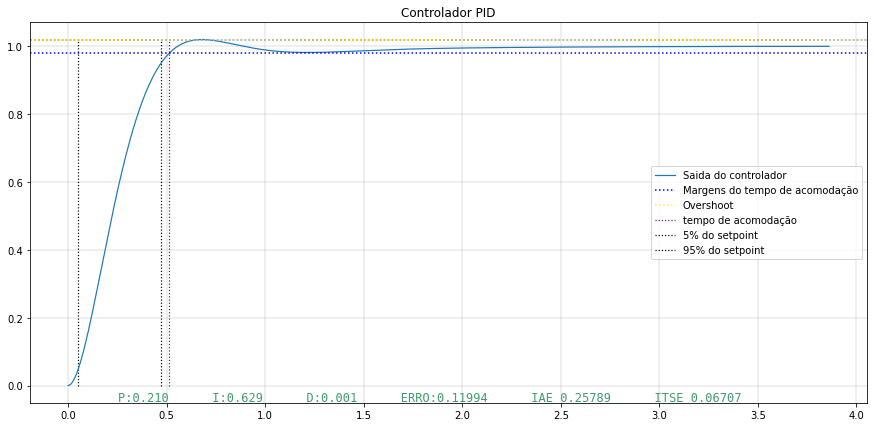

primeira_parcela (overshooting):  0.01713235040116534
segunda_parcela (acomodação) 1.224
quarta parcela (ultimo erro) 1.4765966227514582e-14
quinta parcela (ITSE) 0.06952746706311488
Terceira parcela:  7.11263707441636e-05
primeira_parcela (overshooting):  0.017200875860064135
segunda_parcela (acomodação) 1.2570000000000001
quarta parcela (ultimo erro) 3.2307490016592055e-14
quinta parcela (ITSE) 0.06979154892454532
Terceira parcela:  7.089173775119521e-05
primeira_parcela (overshooting):  0.019078491997702285
segunda_parcela (acomodação) 0.51
quarta parcela (ultimo erro) 2.2315482794965646e-14
quinta parcela (ITSE) 0.06803963756048209
Terceira parcela:  7.090709645503767e-05
primeira_parcela (overshooting):  0.018588890292059457
segunda_parcela (acomodação) 0.515
quarta parcela (ultimo erro) 2.4091839634365897e-14
quinta parcela (ITSE) 0.06789517047550116
Terceira parcela:  7.136283864157722e-05
primeira_parcela (overshooting):  0.017919286876838303
segunda_parcela (acomodação) 0.515


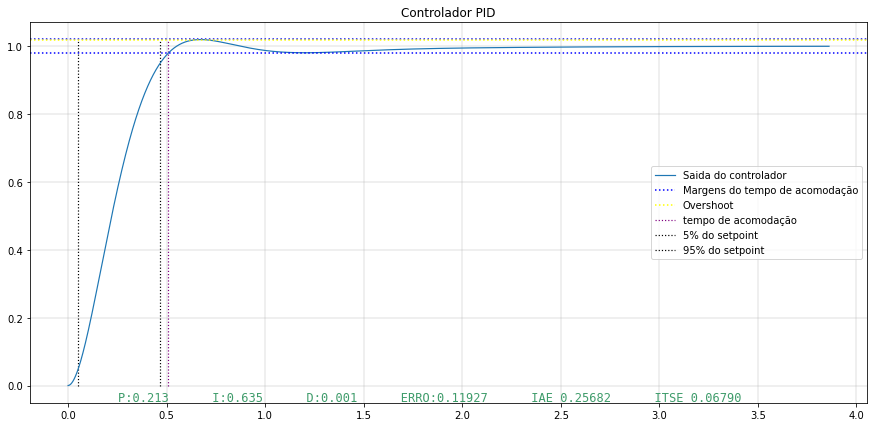

primeira_parcela (overshooting):  0.018519352326878735
segunda_parcela (acomodação) 0.51
quarta parcela (ultimo erro) 1.7208456881689926e-14
quinta parcela (ITSE) 0.06860630449514353
Terceira parcela:  7.08591749892829e-05
primeira_parcela (overshooting):  0.019327721275784082
segunda_parcela (acomodação) 1.212
quarta parcela (ultimo erro) 1.554312234475219e-14
quinta parcela (ITSE) 0.06838813445547529
Terceira parcela:  7.048279487388861e-05
primeira_parcela (overshooting):  0.02084631725728303
segunda_parcela (acomodação) 0.7010000000000001
quarta parcela (ultimo erro) 2.4980018054066022e-14
quinta parcela (ITSE) 0.06679044883615748
Terceira parcela:  7.068829738278096e-05
primeira_parcela (overshooting):  0.020308469179143307
segunda_parcela (acomodação) 0.6920000000000001
quarta parcela (ultimo erro) 2.475797344914099e-14
quinta parcela (ITSE) 0.06688158051104506
Terceira parcela:  7.098208366639028e-05
primeira_parcela (overshooting):  0.019316499294998124
segunda_parcela (acomoda

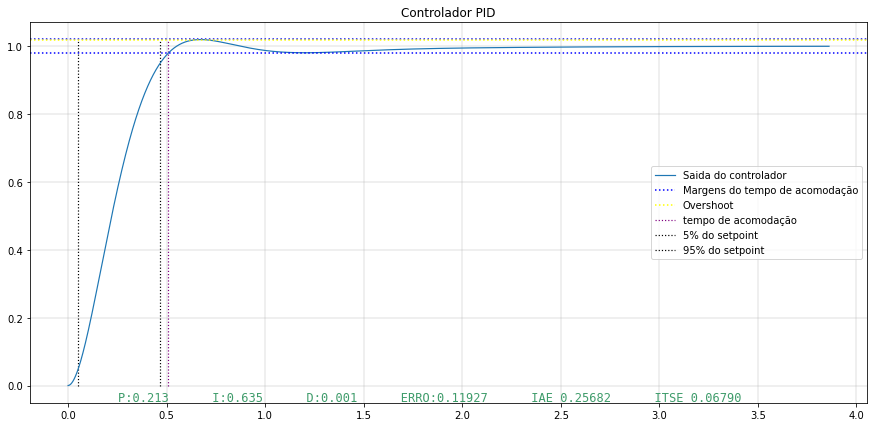

primeira_parcela (overshooting):  0.019914951329738972
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.298161660974074e-14
quinta parcela (ITSE) 0.06764752587263387
Terceira parcela:  7.064338400523502e-05
primeira_parcela (overshooting):  0.020875622504340496
segunda_parcela (acomodação) 0.6970000000000001
quarta parcela (ultimo erro) 2.4091839634365897e-14
quinta parcela (ITSE) 0.06713790023582823
Terceira parcela:  7.039712615723618e-05
primeira_parcela (overshooting):  0.02056607391175791
segunda_parcela (acomodação) 0.6940000000000001
quarta parcela (ultimo erro) 2.4868995751603507e-14
quinta parcela (ITSE) 0.06710788643326664
Terceira parcela:  7.062458173444193e-05
primeira_parcela (overshooting):  0.02046209243133501
segunda_parcela (acomodação) 0.6930000000000001
quarta parcela (ultimo erro) 2.4980018054066022e-14
quinta parcela (ITSE) 0.06706177028361558
Terceira parcela:  7.073128909905081e-05
primeira_parcela (overshooting):  0.02031653346229856
segunda_pa

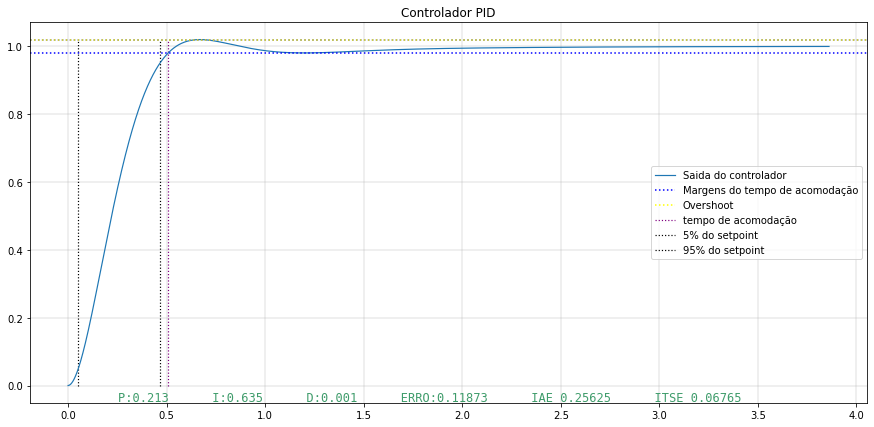

primeira_parcela (overshooting):  0.02096344786167581
segunda_parcela (acomodação) 0.7000000000000001
quarta parcela (ultimo erro) 2.4980018054066022e-14
quinta parcela (ITSE) 0.06695126423872995
Terceira parcela:  7.048306774391314e-05
primeira_parcela (overshooting):  0.0203676527579153
segunda_parcela (acomodação) 0.6880000000000001
quarta parcela (ultimo erro) 2.4202861936828413e-14
quinta parcela (ITSE) 0.06733324299723084
Terceira parcela:  7.058202220842107e-05
primeira_parcela (overshooting):  0.019444367955248065
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.042810365310288e-14
quinta parcela (ITSE) 0.06806511784471549
Terceira parcela:  7.064204789707885e-05
primeira_parcela (overshooting):  0.02008668043704076
segunda_parcela (acomodação) 0.678
quarta parcela (ultimo erro) 2.3647750424515834e-14
quinta parcela (ITSE) 0.06753598459581807
Terceira parcela:  7.061376000788294e-05
primeira_parcela (overshooting):  0.020661827192691495
segunda_parcela (acomoda

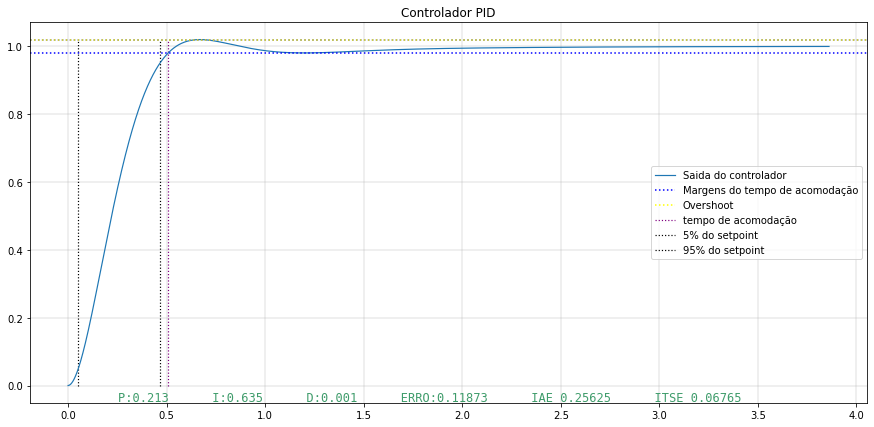

primeira_parcela (overshooting):  0.02083893976799267
segunda_parcela (acomodação) 0.6970000000000001
quarta parcela (ultimo erro) 2.4424906541753444e-14
quinta parcela (ITSE) 0.06710471477715474
Terceira parcela:  7.04472535646109e-05
primeira_parcela (overshooting):  0.018453341307216986
segunda_parcela (acomodação) 0.511
quarta parcela (ultimo erro) 1.787459069646502e-14
quinta parcela (ITSE) 0.06861218662257143
Terceira parcela:  7.089873041715634e-05
primeira_parcela (overshooting):  0.01881754407482239
segunda_parcela (acomodação) 1.206
quarta parcela (ultimo erro) 1.4988010832439613e-14
quinta parcela (ITSE) 0.06861688961219757
Terceira parcela:  7.0652705693921e-05
primeira_parcela (overshooting):  0.02012387262248594
segunda_parcela (acomodação) 0.68
quarta parcela (ultimo erro) 2.3869795029440866e-14
quinta parcela (ITSE) 0.06749519035567626
Terceira parcela:  7.062009252256212e-05
primeira_parcela (overshooting):  0.02054473135997914
segunda_parcela (acomodação) 0.6910000000

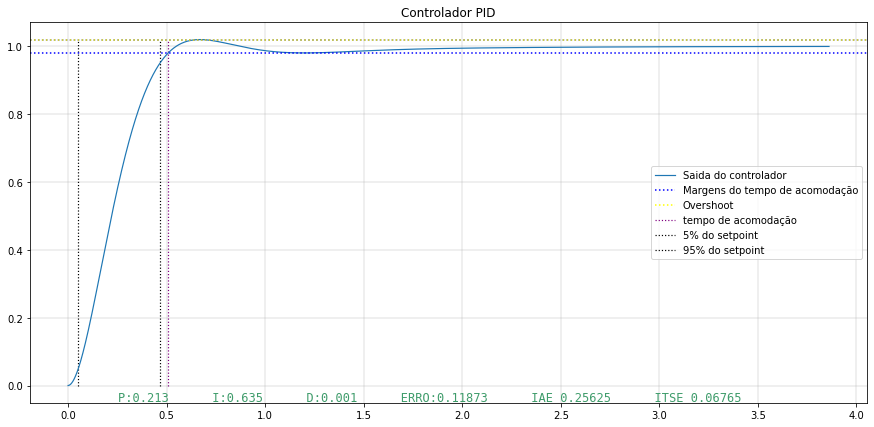

primeira_parcela (overshooting):  0.020097125555546214
segunda_parcela (acomodação) 0.677
quarta parcela (ultimo erro) 2.220446049250313e-14
quinta parcela (ITSE) 0.06766270485152158
Terceira parcela:  7.051178931510345e-05
primeira_parcela (overshooting):  0.017529500495812034
segunda_parcela (acomodação) 0.513
quarta parcela (ultimo erro) 1.2989609388114332e-14
quinta parcela (ITSE) 0.06923947790440266
Terceira parcela:  7.106441701566323e-05
primeira_parcela (overshooting):  0.01933849555708189
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 1.942890293094024e-14
quinta parcela (ITSE) 0.06817005412477083
Terceira parcela:  7.063421568865006e-05
primeira_parcela (overshooting):  0.02040456796416179
segunda_parcela (acomodação) 0.6910000000000001
quarta parcela (ultimo erro) 2.4646951146678475e-14
quinta parcela (ITSE) 0.06712663339226234
Terceira parcela:  7.071855710151865e-05
primeira_parcela (overshooting):  0.020293735677392455
segunda_parcela (acomodação) 0.686
q

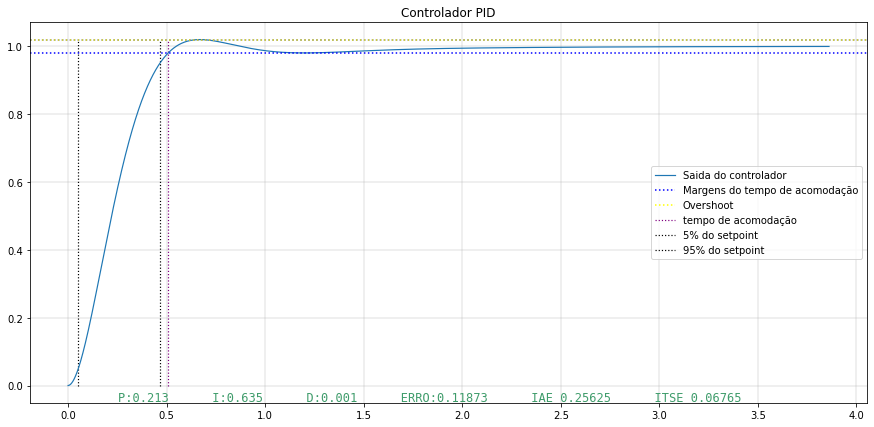

primeira_parcela (overshooting):  0.019674417530544108
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.1094237467877974e-14
quinta parcela (ITSE) 0.06790847455418841
Terceira parcela:  7.060787754990664e-05
primeira_parcela (overshooting):  0.018089702412100506
segunda_parcela (acomodação) 0.512
quarta parcela (ultimo erro) 1.7763568394002505e-14
quinta parcela (ITSE) 0.068767105321215
Terceira parcela:  7.103111975192587e-05
primeira_parcela (overshooting):  0.019992435942216114
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.298161660974074e-14
quinta parcela (ITSE) 0.06761188961595825
Terceira parcela:  7.061912860226485e-05
primeira_parcela (overshooting):  0.02023204513025223
segunda_parcela (acomodação) 0.6880000000000001
quarta parcela (ultimo erro) 2.4868995751603507e-14
quinta parcela (ITSE) 0.06709075313984918
Terceira parcela:  7.086452232553735e-05
primeira_parcela (overshooting):  0.02000602428329379
segunda_parcela (acomodação) 0.672
qu

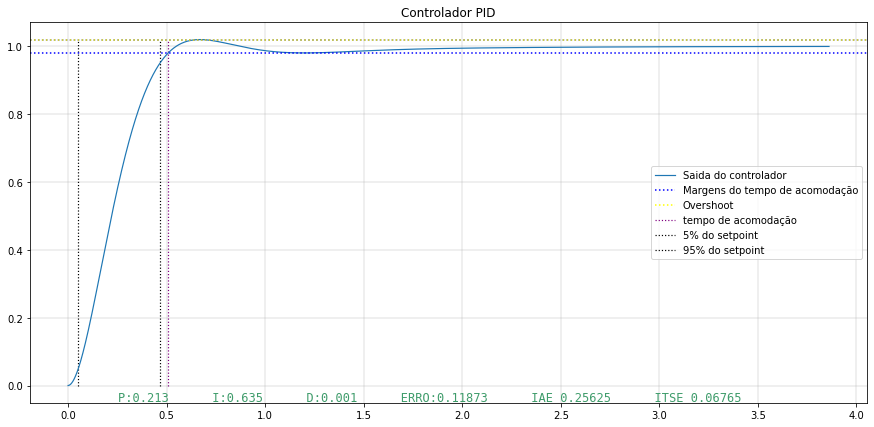

primeira_parcela (overshooting):  0.019479900673881723
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.120525977034049e-14
quinta parcela (ITSE) 0.06797173797420836
Terceira parcela:  7.068768626409547e-05
primeira_parcela (overshooting):  0.019128783897197188
segunda_parcela (acomodação) 0.51
quarta parcela (ultimo erro) 2.220446049250313e-14
quinta parcela (ITSE) 0.06803208574496192
Terceira parcela:  7.087814825826136e-05
primeira_parcela (overshooting):  0.02046296582171525
segunda_parcela (acomodação) 0.6910000000000001
quarta parcela (ultimo erro) 2.4868995751603507e-14
quinta parcela (ITSE) 0.06720955492533297
Terceira parcela:  7.061450384684458e-05
primeira_parcela (overshooting):  0.0195365682175499
segunda_parcela (acomodação) 0.51
quarta parcela (ultimo erro) 2.453592884421596e-14
quinta parcela (ITSE) 0.06752478256727174
Terceira parcela:  7.099463394903317e-05
primeira_parcela (overshooting):  0.019667343915032554
segunda_parcela (acomodação) 0.509
quart

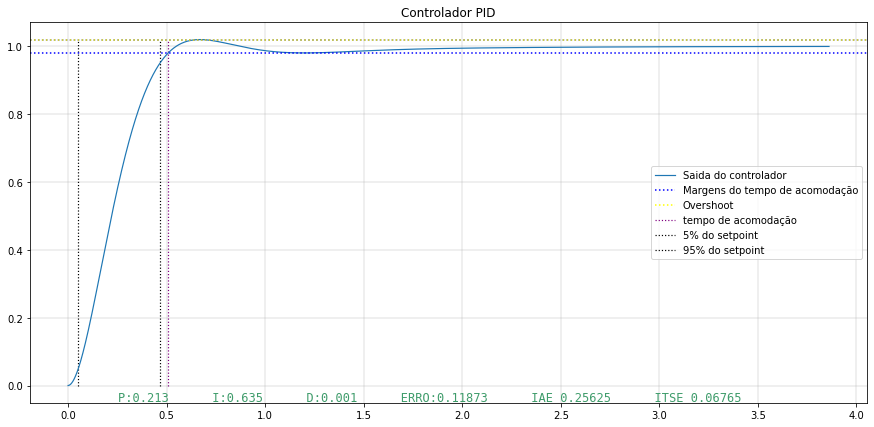

primeira_parcela (overshooting):  0.019490928439248156
segunda_parcela (acomodação) 0.508
quarta parcela (ultimo erro) 2.1871393585115584e-14
quinta parcela (ITSE) 0.06791602039750048
Terceira parcela:  7.072367127205115e-05
primeira_parcela (overshooting):  0.020132486310364905
segunda_parcela (acomodação) 0.681
quarta parcela (ultimo erro) 2.4424906541753444e-14
quinta parcela (ITSE) 0.06738469694524624
Terceira parcela:  7.06999431152744e-05
primeira_parcela (overshooting):  0.02019692441156984
segunda_parcela (acomodação) 0.683
quarta parcela (ultimo erro) 2.4091839634365897e-14
quinta parcela (ITSE) 0.0674131229910054
Terceira parcela:  7.063420060492068e-05
primeira_parcela (overshooting):  0.018995512719294227
segunda_parcela (acomodação) 0.511
quarta parcela (ultimo erro) 2.298161660974074e-14
quinta parcela (ITSE) 0.06799187341891201
Terceira parcela:  7.100062758443482e-05
primeira_parcela (overshooting):  0.019424171044916116
segunda_parcela (acomodação) 0.509
quarta parcela

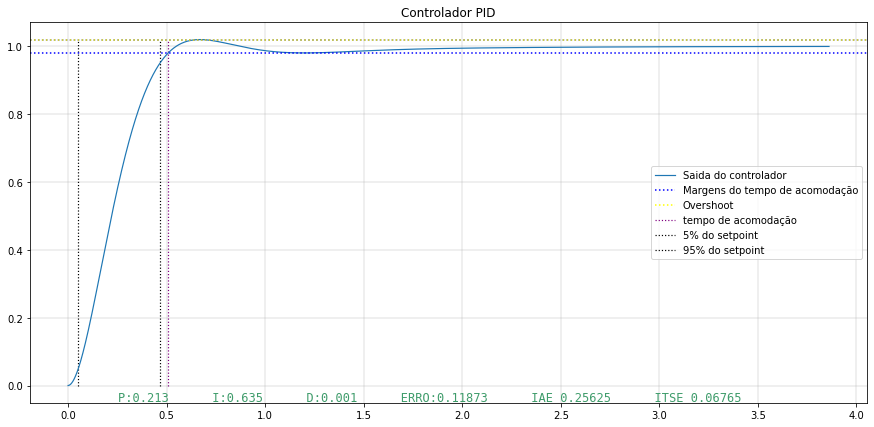

primeira_parcela (overshooting):  0.019537883758792063
segunda_parcela (acomodação) 0.508
quarta parcela (ultimo erro) 2.2093438190040615e-14
quinta parcela (ITSE) 0.06788416006468324
Terceira parcela:  7.071556857493442e-05
primeira_parcela (overshooting):  0.020298504006933005
segunda_parcela (acomodação) 0.686
quarta parcela (ultimo erro) 2.398081733190338e-14
quinta parcela (ITSE) 0.06738083698166089
Terceira parcela:  7.059138875153601e-05
primeira_parcela (overshooting):  0.019669688527794493
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.19824158875781e-14
quinta parcela (ITSE) 0.06784450304810781
Terceira parcela:  7.065747207012805e-05
primeira_parcela (overshooting):  0.019253684509805025
segunda_parcela (acomodação) 0.51
quarta parcela (ultimo erro) 2.2870594307278225e-14
quinta parcela (ITSE) 0.06790142505921612
Terceira parcela:  7.089379551686946e-05
primeira_parcela (overshooting):  0.019330125148198096
segunda_parcela (acomodação) 0.509
quarta parcela

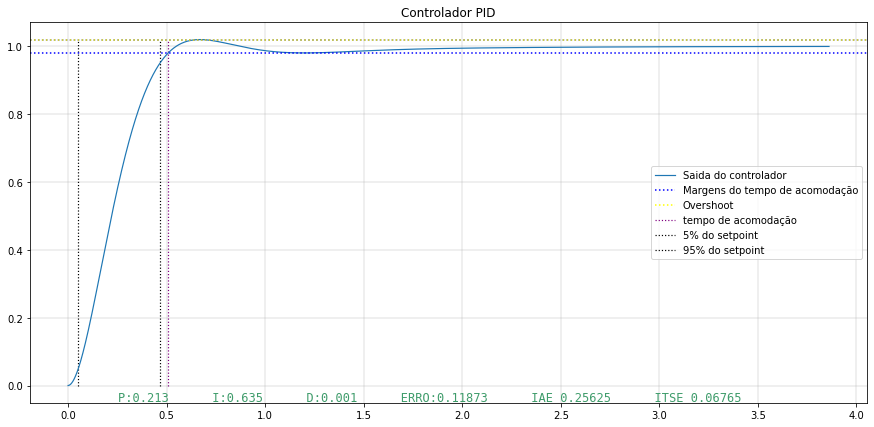

primeira_parcela (overshooting):  0.019574667928825784
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.1760371282653068e-14
quinta parcela (ITSE) 0.06790015795337624
Terceira parcela:  7.067853921385701e-05
primeira_parcela (overshooting):  0.019925455789350455
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.220446049250313e-14
quinta parcela (ITSE) 0.06772920081658056
Terceira parcela:  7.057401222760287e-05
primeira_parcela (overshooting):  0.01956385808642125
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.1316282072803006e-14
quinta parcela (ITSE) 0.06793559337587497
Terceira parcela:  7.065903275560388e-05
primeira_parcela (overshooting):  0.01960662730851004
segunda_parcela (acomodação) 0.508
quarta parcela (ultimo erro) 2.2870594307278225e-14
quinta parcela (ITSE) 0.0677832388102313
Terceira parcela:  7.074640513553604e-05
primeira_parcela (overshooting):  0.019410868165605333
segunda_parcela (acomodação) 0.508
quarta parcela

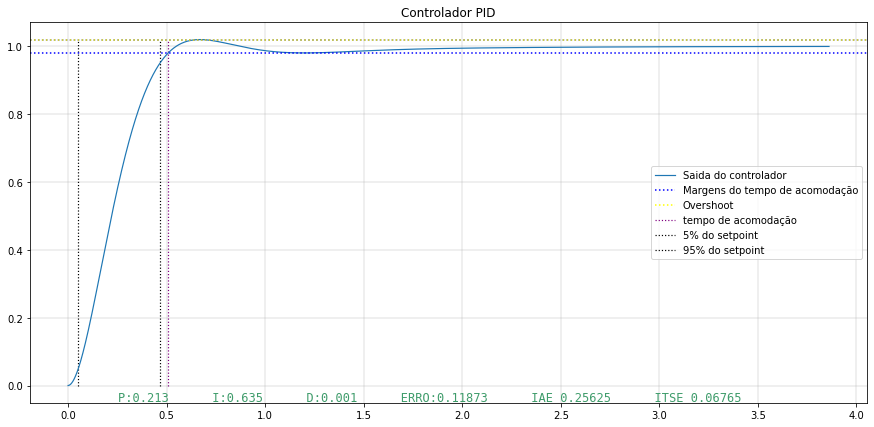

primeira_parcela (overshooting):  0.01965838319415747
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.1760371282653068e-14
quinta parcela (ITSE) 0.06788676373062967
Terceira parcela:  7.063279475962379e-05
primeira_parcela (overshooting):  0.019680246202594454
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.098321516541546e-14
quinta parcela (ITSE) 0.06794099914512672
Terceira parcela:  7.057860845969317e-05
primeira_parcela (overshooting):  0.019908567557785695
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.298161660974074e-14
quinta parcela (ITSE) 0.06765791858611447
Terceira parcela:  7.064038657541635e-05
primeira_parcela (overshooting):  0.01995344733818194
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.2870594307278225e-14
quinta parcela (ITSE) 0.06766149561344513
Terceira parcela:  7.060851376325812e-05
primeira_parcela (overshooting):  0.019626200113823877
segunda_parcela (acomodação) 0.507
quarta parcela

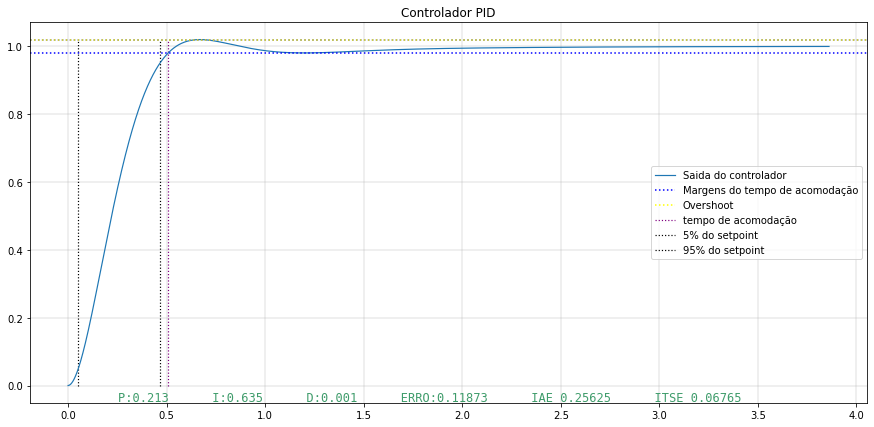

primeira_parcela (overshooting):  0.019795755884377764
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.1760371282653068e-14
quinta parcela (ITSE) 0.06781224889572282
Terceira parcela:  7.059770354258046e-05
primeira_parcela (overshooting):  0.019634413087670666
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.0650148258027912e-14
quinta parcela (ITSE) 0.06795710289995173
Terceira parcela:  7.059698480623457e-05
primeira_parcela (overshooting):  0.020169942018137377
segunda_parcela (acomodação) 0.682
quarta parcela (ultimo erro) 2.3869795029440866e-14
quinta parcela (ITSE) 0.06744600737621671
Terceira parcela:  7.062714806912508e-05
primeira_parcela (overshooting):  0.020212539584566036
segunda_parcela (acomodação) 0.682
quarta parcela (ultimo erro) 2.3092638912203256e-14
quinta parcela (ITSE) 0.0675567780270029
Terceira parcela:  7.05146113672562e-05
primeira_parcela (overshooting):  0.019898520136094167
segunda_parcela (acomodação) 0.506
quarta parce

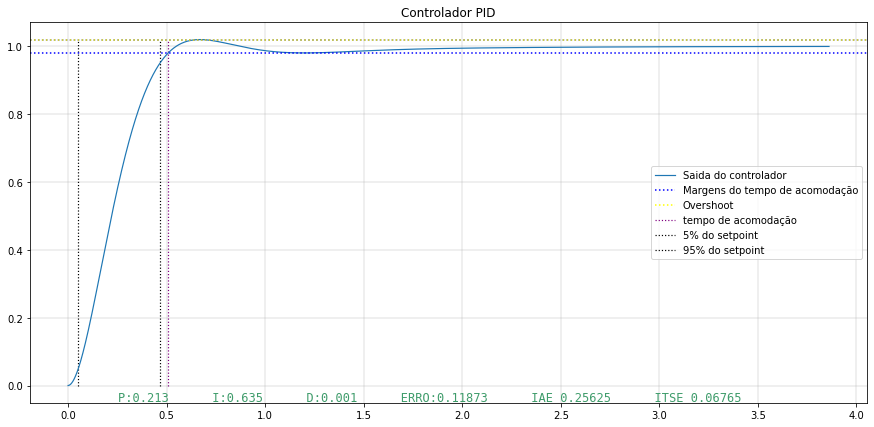

primeira_parcela (overshooting):  0.019893336203826717
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.2648549702353193e-14
quinta parcela (ITSE) 0.06774213092399604
Terceira parcela:  7.058608168890605e-05
primeira_parcela (overshooting):  0.019748382074402215
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.2315482794965646e-14
quinta parcela (ITSE) 0.06782341017260153
Terceira parcela:  7.062074453518022e-05
primeira_parcela (overshooting):  0.020068152377654913
segunda_parcela (acomodação) 0.677
quarta parcela (ultimo erro) 2.3647750424515834e-14
quinta parcela (ITSE) 0.06753009084418005
Terceira parcela:  7.063056181275069e-05
primeira_parcela (overshooting):  0.02033475571776
segunda_parcela (acomodação) 0.686
quarta parcela (ultimo erro) 2.275957200481571e-14
quinta parcela (ITSE) 0.06748137819141219
Terceira parcela:  7.04913975412348e-05
primeira_parcela (overshooting):  0.020132088919903257
segunda_parcela (acomodação) 0.679
quarta parcela (

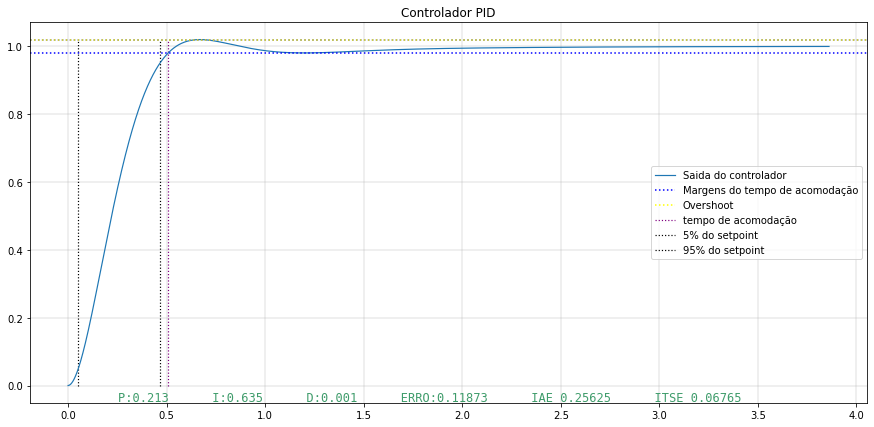

primeira_parcela (overshooting):  0.019866456893505857
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.2537527399890678e-14
quinta parcela (ITSE) 0.06774841562160906
Terceira parcela:  7.05988409976483e-05
primeira_parcela (overshooting):  0.01976883594883927
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.2426505097428162e-14
quinta parcela (ITSE) 0.06777350872230249
Terceira parcela:  7.064477173104589e-05
primeira_parcela (overshooting):  0.019817225312628084
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.2426505097428162e-14
quinta parcela (ITSE) 0.06773609063780169
Terceira parcela:  7.064212879878166e-05
primeira_parcela (overshooting):  0.020259380750202283
segunda_parcela (acomodação) 0.684
quarta parcela (ultimo erro) 2.3314683517128287e-14
quinta parcela (ITSE) 0.06749334711298006
Terceira parcela:  7.053227890461043e-05
primeira_parcela (overshooting):  0.020171081369218413
segunda_parcela (acomodação) 0.681
quarta parce

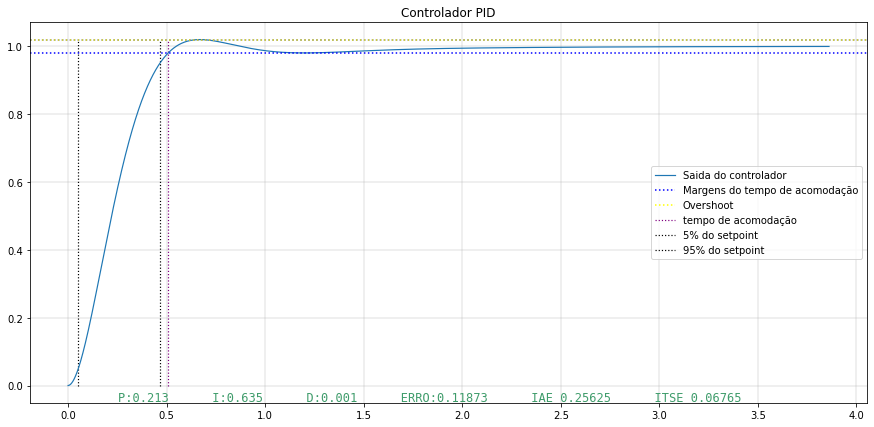

primeira_parcela (overshooting):  0.0197462120026084
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.1871393585115584e-14
quinta parcela (ITSE) 0.06781980162033842
Terceira parcela:  7.06250233127814e-05
primeira_parcela (overshooting):  0.01962569369715972
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.1760371282653068e-14
quinta parcela (ITSE) 0.06787786279742045
Terceira parcela:  7.066206224815873e-05
primeira_parcela (overshooting):  0.019744905117137
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.220446049250313e-14
quinta parcela (ITSE) 0.06779017451855068
Terceira parcela:  7.06480179062011e-05
primeira_parcela (overshooting):  0.02001821195184106
segunda_parcela (acomodação) 0.672
quarta parcela (ultimo erro) 2.3203661214665772e-14
quinta parcela (ITSE) 0.06760552159110503
Terceira parcela:  7.060605118928226e-05
primeira_parcela (overshooting):  0.02001814506518218
segunda_parcela (acomodação) 0.672
quarta parcela (ultim

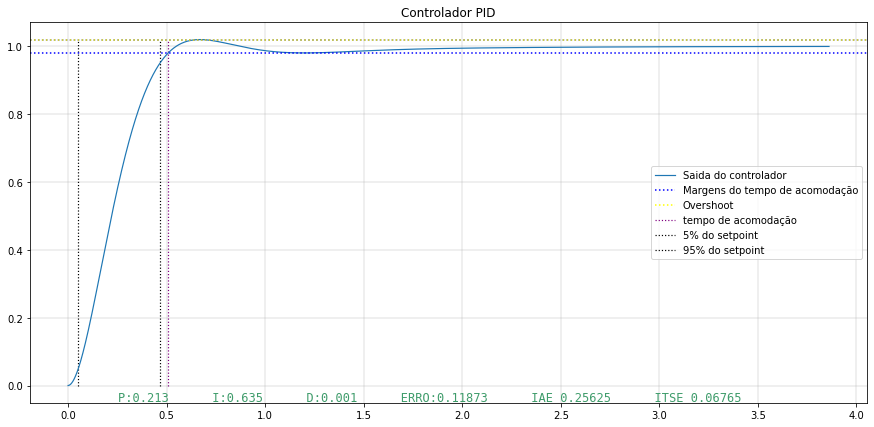

primeira_parcela (overshooting):  0.01963827037809418
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.19824158875781e-14
quinta parcela (ITSE) 0.06788296378833858
Terceira parcela:  7.06491233397602e-05
primeira_parcela (overshooting):  0.01949594604052285
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.0761170560490427e-14
quinta parcela (ITSE) 0.06798900866288617
Terceira parcela:  7.066416053992802e-05
primeira_parcela (overshooting):  0.019886332381381377
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.3092638912203256e-14
quinta parcela (ITSE) 0.06766968912838199
Terceira parcela:  7.064550475353896e-05
primeira_parcela (overshooting):  0.01976020698443004
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.2870594307278225e-14
quinta parcela (ITSE) 0.06774285837284248
Terceira parcela:  7.067355452301329e-05
primeira_parcela (overshooting):  0.01982293747998143
segunda_parcela (acomodação) 0.506
quarta parcela (u

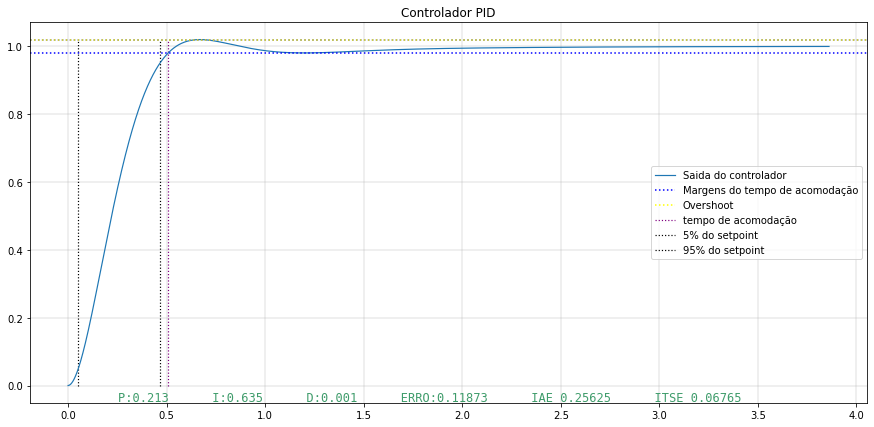

primeira_parcela (overshooting):  0.019612772786480104
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.1871393585115584e-14
quinta parcela (ITSE) 0.06789045558857741
Terceira parcela:  7.066054847028064e-05
primeira_parcela (overshooting):  0.019540412296655596
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.098321516541546e-14
quinta parcela (ITSE) 0.0679690053463774
Terceira parcela:  7.065001868265023e-05
primeira_parcela (overshooting):  0.020010090282293724
segunda_parcela (acomodação) 0.672
quarta parcela (ultimo erro) 2.3425705819590803e-14
quinta parcela (ITSE) 0.06756585189341247
Terceira parcela:  7.064203323151625e-05
primeira_parcela (overshooting):  0.019635299307819043
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.2537527399890678e-14
quinta parcela (ITSE) 0.06780918813859706
Terceira parcela:  7.070658529949755e-05
primeira_parcela (overshooting):  0.019724623779461936
segunda_parcela (acomodação) 0.507
quarta parce

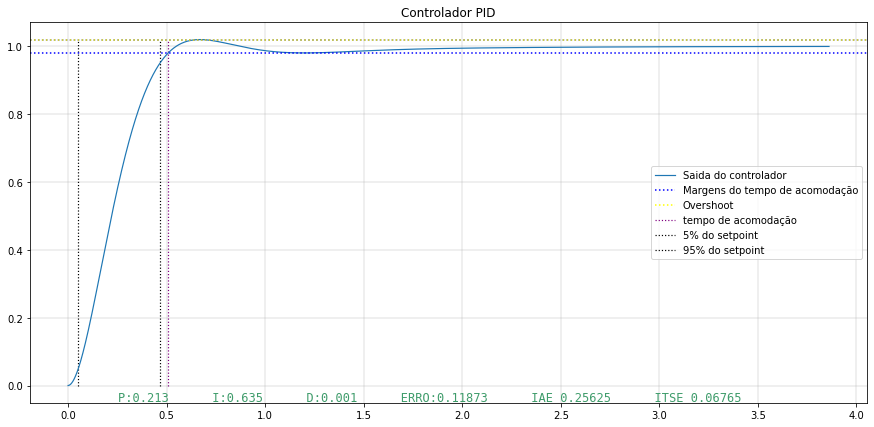

primeira_parcela (overshooting):  0.019649999700644294
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.1871393585115584e-14
quinta parcela (ITSE) 0.06786069415988867
Terceira parcela:  7.065801094007685e-05
primeira_parcela (overshooting):  0.01969591428410622
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.2093438190040615e-14
quinta parcela (ITSE) 0.06785825876397564
Terceira parcela:  7.062962939199587e-05
primeira_parcela (overshooting):  0.01997030004840661
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.3314683517128287e-14
quinta parcela (ITSE) 0.06759953547471267
Terceira parcela:  7.06429274953538e-05
primeira_parcela (overshooting):  0.01968082758934253
segunda_parcela (acomodação) 0.507
quarta parcela (ultimo erro) 2.2648549702353193e-14
quinta parcela (ITSE) 0.06777922008665141
Terceira parcela:  7.069917474250891e-05
primeira_parcela (overshooting):  0.019720642845692415
segunda_parcela (acomodação) 0.507
quarta parcela

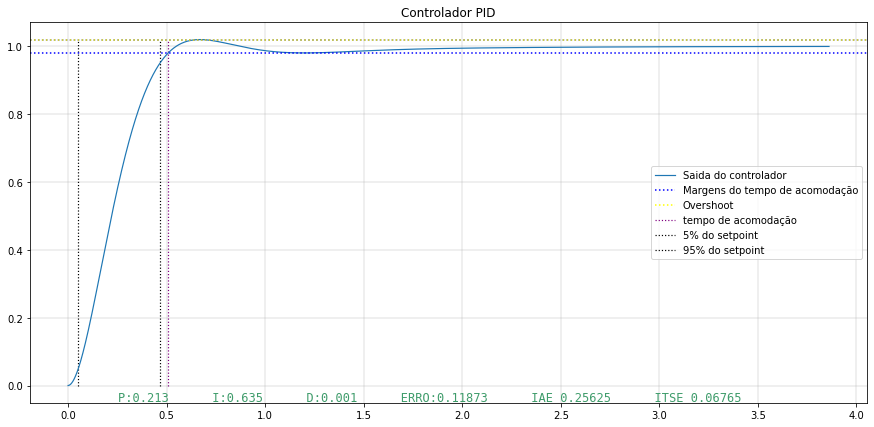

primeira_parcela (overshooting):  0.019914951329738972
segunda_parcela (acomodação) 0.506
quarta parcela (ultimo erro) 2.298161660974074e-14
quinta parcela (ITSE) 0.06764752587263387
Terceira parcela:  7.064338400523502e-05


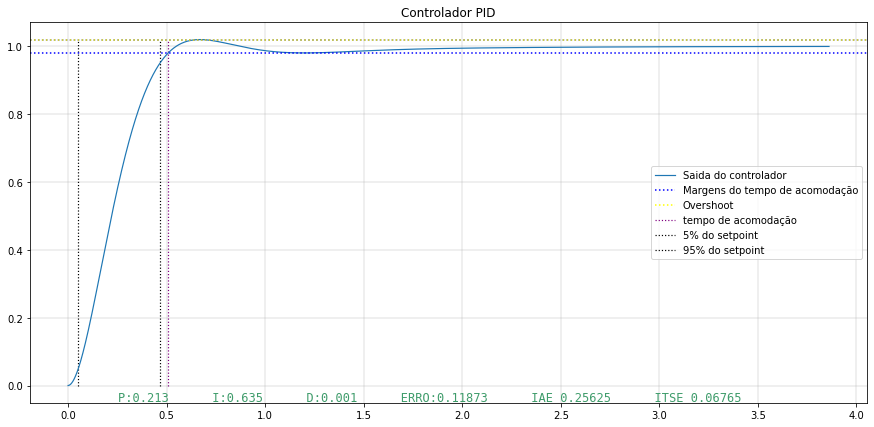

Kp:  0.21336472916070964
Ti:  0.635096130955356
Td:  0.001
< Critério de parada atinigido, nenhuma particula teve uma melhora maior que 0.001 por 5 iterações consecutivas. >
< 59 iterações antes de atingir o critério. >
< O tempo médio das iterações foi 90.587s. >
< Tempo total de execução: 89.17min


In [4]:
ini = time()

# w = 0.75 # fator de inercia
# c1 = 1.0  # fator cognitivo
# c2 = 0.5 # fator social

w = 0.75 # fator de inercia
c1 = 1.0  # fator cognitivo
c2 = 0.6 # fator social
 
n_part = 10 # numero de particulas
parada = 0.001 # critério de parada

sistema = list()

particulas = PSO.inicializate(n_part)  

sistema = PSO.update_sistem(sistema, particulas, w, c1, c2, parada, pid_param)
fim = time()

print(f"< Tempo total de execução: {round((fim-ini)/60, 2)}min")

In [5]:
sistema2df(sistema,'C:\\Users\\vitor\\Documents\\GitHub\\IC-IT\\resultados')